# Speculation and Conclusion



Q. What is the date of the most confirmed cases? how many people are infected in that day?<br>

A. 3nd Dec, 296 confirmed cases. Summer and Winter are getting serious. For the last 30 days, the spread of infection has been serious since mid Nov.

Q. Which month / week the most confirmed cases appeared in?<br>

A. Month: August and November, Week: 35's and 48's week


Q. Since when, the spread of coronavirus has been seroious?<br>

A. It has been serious since mid Aug

Q. Which day of the week has the most confirmed cases?<br>

A. It appear that August and November have the most confirmed cases.In August, Saturday has the most confirmed cases. In November, every week day was serious about the spread of coronavirus.

Q. Which district has the most confirmed cases?<br>

A. Songpa-gu is ranked No.1, and it is followed by Gangseo-gu and Kwanak-gu.

Q. What is the most dangerous route for the spread of coronavirus?<br>

A. Sarang Jeil Church was the dangerous route for the spread of coronavirus. There was mass gatherings from the church. It was led by a conservative pastor for anti-government demonstration. The church's mass gathering was followed by Danse course in Gangsegu. 

Q. Which month has the most unknown route of confirmed cases?<br>

A. The most unknown route of confirmed cases appeared in mid August. It was because there was a 2nd explosive increse in confirmed cases in August.

Q. Whos casused the most spread?<br>

A. The confirmed case 815 caused the most spread of coronavirus by going to a mass gathering in Seoul on 15th August. 126 people were infected by 815.

Q. Which country has caused the most confirmed cases?<br>

A. The people flighted from the US have the most confirmed cases. and it was followed by Asia. the people came from the Philippines caused the most confirmed cases amongst ASIA. 


Q. What month has the most imported cases from overseas?<br>

A. March and April have the most imported cases from overseas. Since then, the government took control of coronavirus very well for 6 consecutive months. In November, the number of imported cases from overseas got increased.

Q. Which district has the most imported cases from overseas?<br>

A. Gangnam-gu has the most imported cases from overseas. It is followed by Yongsan-gu and mapo-gu


# Used modules

pandas, numpy, matplotlib, sqlite3, requests, re

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import requests
from tqdm import trange
import time

%matplotlib inline

# korean font settings
plt.rc("font", family="NanumGothic")
plt.rc("axes", unicode_minus=False)


# display settings

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# data settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Web scraping

In [2]:
url = "https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1"
url = url + "&order%5B0%5D%5Bdir%5D=desc&start=100&length=100"

rep = requests.get(url)
print("request status code is " + str(rep.status_code))
data_json = rep.json()
df = pd.DataFrame(data_json['data'])


total_records = data_json['recordsTotal']
print("total records are " + str(total_records))

end_page = round(total_records / 100)+ 1
print("end_page is " + str(end_page))

request status code is 200
total records are 9951
end_page is 101


In [3]:
def scraping_covid19_data(page_number):
    
    start_list = (page_number - 1) * 100
    url = "https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=" + str(page_number)
    url = url + "&order%5B0%5D%5Bdir%5D=desc&start="+str(start_list)+"&length=100"
    rep = requests.get(url)
    data_json = rep.json()
    return data_json
    

In [4]:
def get_dataset_from_pages(start_page, end_page):

    
    page_list = []
    for page_number in trange(start_page, end_page + 1):
        one_page = scraping_covid19_data(page_number)
        if len(one_page["data"]) > 0:
            one_page = pd.DataFrame(one_page["data"])
            page_list.append(one_page)

            time.sleep(0.5)
        else:
            return page_list
    return page_list

In [5]:
start_page = 1
data_json = get_dataset_from_pages(start_page, end_page)

df = pd.concat(data_json)
df.head()

#df = pd.read_csv("data/covid_19_in_seoul_12.02.analysis.csv")
#df.shape

 99%|█████████▉| 100/101 [01:29<00:00,  1.20it/s]

,0,1,2,3,4,5,6
0,<p class='corona19_no'>9951</p>,36883,12.04.,성북구,-,감염경로 조사중,<b class=''></b>
1,<p class='corona19_no'>9950</p>,36886,12.04.,기타,-,감염경로 조사중,<b class=''></b>
2,<p class='corona19_no'>9949</p>,36256,12.04.,타시도,-,감염경로 조사중,<b class=''></b>
3,<p class='corona19_no'>9948</p>,36532,12.04.,타시도,-,감염경로 조사중,<b class=''></b>
4,<p class='corona19_no'>9947</p>,36522,12.04.,타시도,-,감염경로 조사중,<b class=''></b>


In [6]:
column_list = ["연번", "환자", "확진일", "거주지", "여행력", "접촉력", "퇴원현황"]

df.columns = column_list

print(df.shape)
df.head()


(9951, 7)


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,<p class='corona19_no'>9951</p>,36883,12.04.,성북구,-,감염경로 조사중,<b class=''></b>
1,<p class='corona19_no'>9950</p>,36886,12.04.,기타,-,감염경로 조사중,<b class=''></b>
2,<p class='corona19_no'>9949</p>,36256,12.04.,타시도,-,감염경로 조사중,<b class=''></b>
3,<p class='corona19_no'>9948</p>,36532,12.04.,타시도,-,감염경로 조사중,<b class=''></b>
4,<p class='corona19_no'>9947</p>,36522,12.04.,타시도,-,감염경로 조사중,<b class=''></b>


In [7]:
import re
def extract_number(num_string):
    if type(num_string) == str:
        num_string = num_string.replace("corona19", "")
        num = re.sub("[^0-9]", "", num_string)
        num = int(num)
        return num
    else:
        return num_string

In [8]:
num_string = "<p class='corona19_no'>9421</p>"
extract_number(num_string)

9421

In [9]:
df["연번"] = df["연번"].map(extract_number)

In [10]:
df["연번"].head()

0    9951
1    9950
2    9949
3    9948
4    9947
Name: 연번, dtype: int64

In [11]:
def extract_hangeul(origin_text):
    subtract_text = re.sub("[^가-힣]", "", str(origin_text))
    return subtract_text

In [12]:
df["퇴원현황"] = df["퇴원현황"].map(extract_hangeul)
df["퇴원현황"].value_counts()

퇴원    6888
      2963
사망     100
Name: 퇴원현황, dtype: int64

In [13]:
# df.loc[df["퇴원현황"].str.contains("퇴원"), "퇴원현황"] = "퇴원"
# df.loc[df["퇴원현황"].str.contains("사망"), "퇴원현황"] = "사망"
# df.loc[~df["퇴원현황"].str.contains("퇴원|사망"), "퇴원현황"] = np.nan
# df["퇴원현황"].value_counts()

In [14]:
lastday = df.iloc[0]["확진일"]

fileName = "data/covid_19_in_seoul_" + lastday + "analysis.csv"
fileName

df.to_csv(fileName, index=False, encoding="utf-8-sig")


# Check data

In [15]:
covid_table = pd.read_csv(fileName)
covid_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9951 entries, 0 to 9950
Data columns (total 7 columns):
연번      9951 non-null int64
환자      9949 non-null object
확진일     9951 non-null object
거주지     9951 non-null object
여행력     9951 non-null object
접촉력     9951 non-null object
퇴원현황    6988 non-null object
dtypes: int64(1), object(6)
memory usage: 544.3+ KB


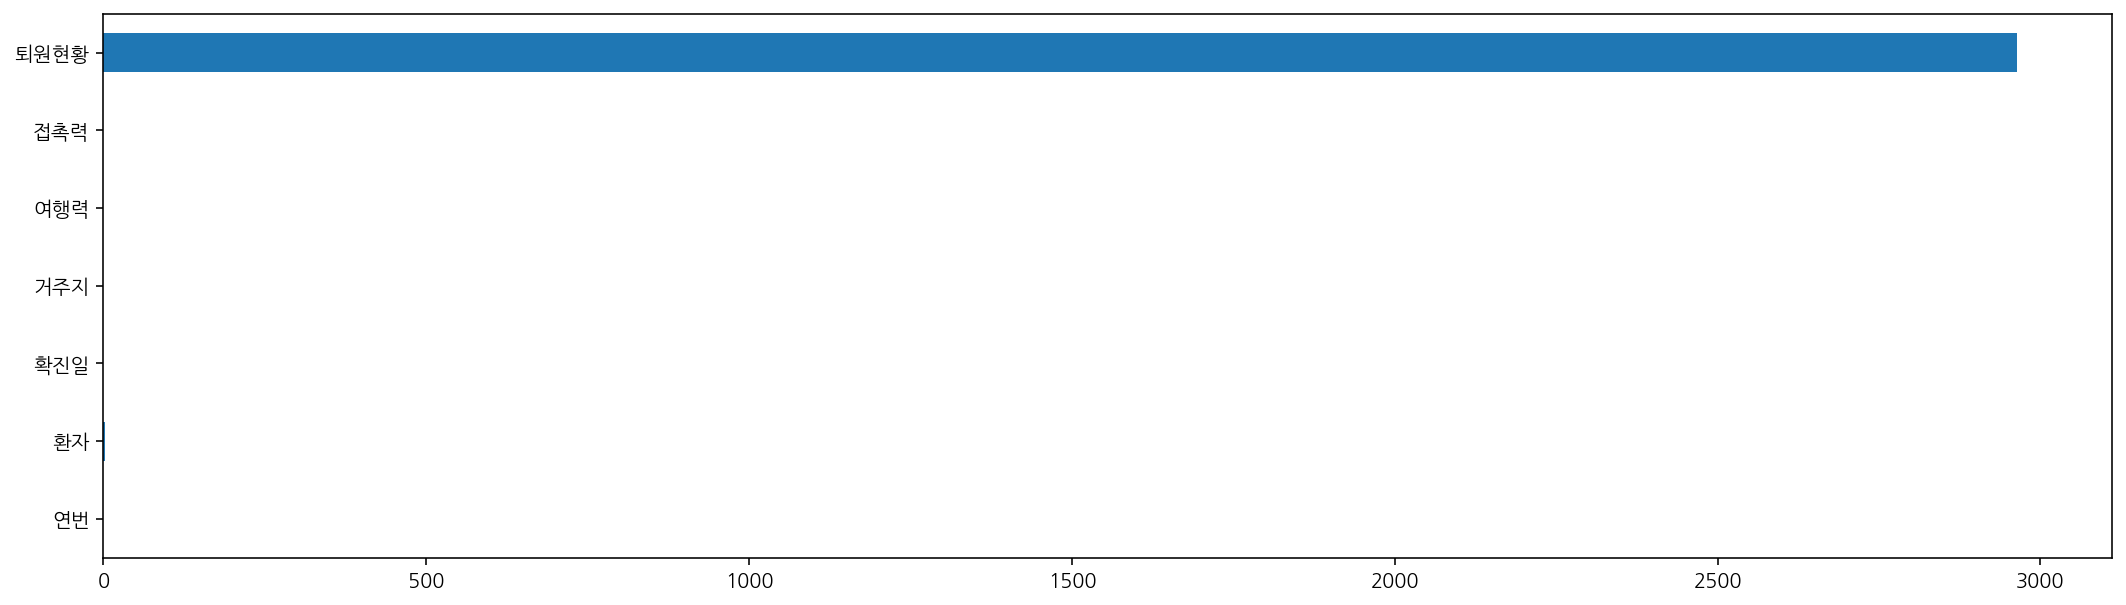

In [16]:
plt.rc("font", family="NanumGothic")
covid_table.isnull().sum().plot.barh(figsize=(18,5))

In [17]:
covid_table.shape

(9951, 7)

# Data preprocessing

In [18]:
print(covid_table["확진일"].dtype)
covid_table["확진일"] = covid_table["확진일"].str.replace(".","-")
covid_table["확진일"] = covid_table["확진일"].str.slice_replace(-1, repl='')
covid_table["확진일"] = pd.to_datetime("2020-" +covid_table["확진일"])
print(covid_table["확진일"].dtype)

object
datetime64[ns]


In [19]:
covid_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9951 entries, 0 to 9950
Data columns (total 7 columns):
연번      9951 non-null int64
환자      9949 non-null object
확진일     9951 non-null datetime64[ns]
거주지     9951 non-null object
여행력     9951 non-null object
접촉력     9951 non-null object
퇴원현황    6988 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 544.3+ KB


In [20]:
covid_table["확진일(월)"] = covid_table["확진일"].dt.month
covid_table["확진일(주)"] = covid_table["확진일"].dt.week

In [21]:
covid_table.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일(월),확진일(주)
0,9951,36883,2020-12-04,성북구,-,감염경로 조사중,NaN,12,49
1,9950,36886,2020-12-04,기타,-,감염경로 조사중,NaN,12,49
2,9949,36256,2020-12-04,타시도,-,감염경로 조사중,NaN,12,49
3,9948,36532,2020-12-04,타시도,-,감염경로 조사중,NaN,12,49
4,9947,36522,2020-12-04,타시도,-,감염경로 조사중,NaN,12,49


## Number of confirmed cases per day

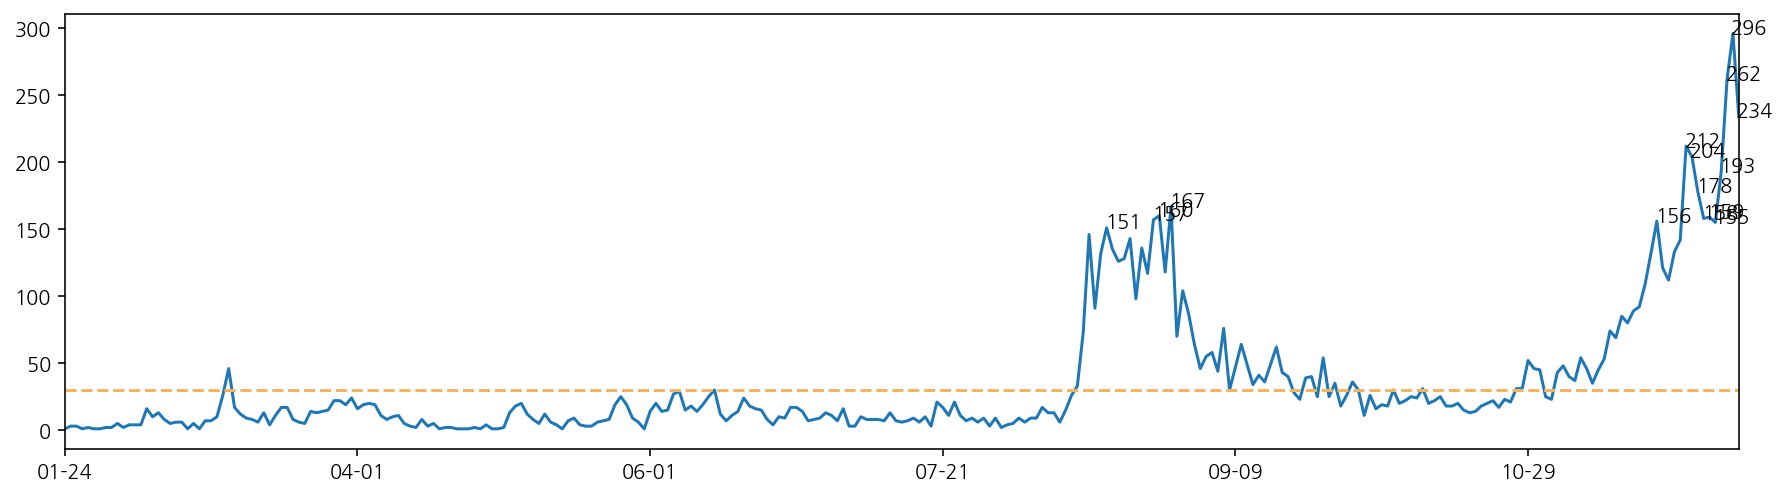

In [22]:
covid_table["확진일(월일)"] = covid_table["확진일"].astype(str).map(lambda x: x[-5:])
day_count = covid_table["확진일(월일)"].value_counts().sort_index()


g = day_count.plot(figsize=(15, 4))
plt.axhline(30, color="#f5b461", linestyle="--")
for i in range(len(day_count)):
    if day_count.iloc[i] > 150:
        g.text(x=i-0.3, y=day_count.iloc[i], s = day_count.iloc[i])


## Date of the most confirmed cases and the number of confirmed cases

In [23]:
most_confirmed_case = covid_table["확진일(월일)"].value_counts().sort_values(ascending=False).head(1)
most_confirmed_case

12-03    296
Name: 확진일(월일), dtype: int64

## Number of confirmed cases within the last 30 days

In [24]:
covid_table[covid_table["확진일(월일)"] == most_confirmed_case.index[0]].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일(월),확진일(주),확진일(월일)
234,9717,36442,2020-12-03,강북구,-,감염경로 조사중,NaN,12,49,12-03
235,9716,36079,2020-12-03,양천구,-,영등포구 소재 콜센터 관련,NaN,12,49,12-03
236,9715,36061,2020-12-03,은평구,-,영등포구 소재 콜센터 관련,NaN,12,49,12-03
237,9714,36074,2020-12-03,타시도,-,영등포구 소재 콜센터 관련,NaN,12,49,12-03
238,9713,36199,2020-12-03,강동구,-,감염경로 조사중,NaN,12,49,12-03


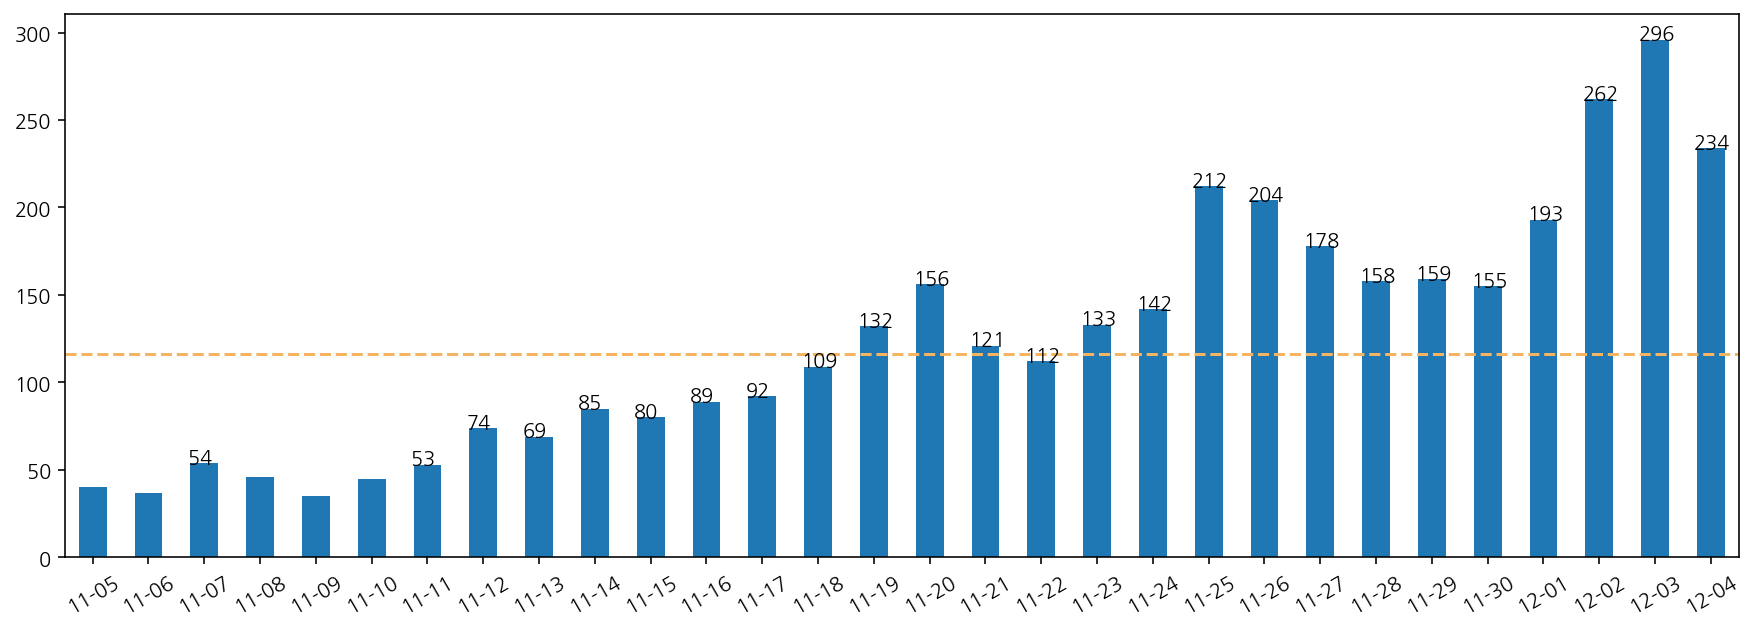

In [25]:
recent30days = covid_table["확진일(월일)"].value_counts().sort_index().tail(30)
g = recent30days.plot.bar(figsize=(15,5), rot=30)
plt.axhline(recent30days.median(), color="#f5b461", linestyle="--")
for i in range(len(recent30days)):
    if recent30days.iloc[i] > 50:
        g.text(x=i-0.3, y=recent30days.iloc[i], s = recent30days.iloc[i])

## Number of confirmed cases per month and week

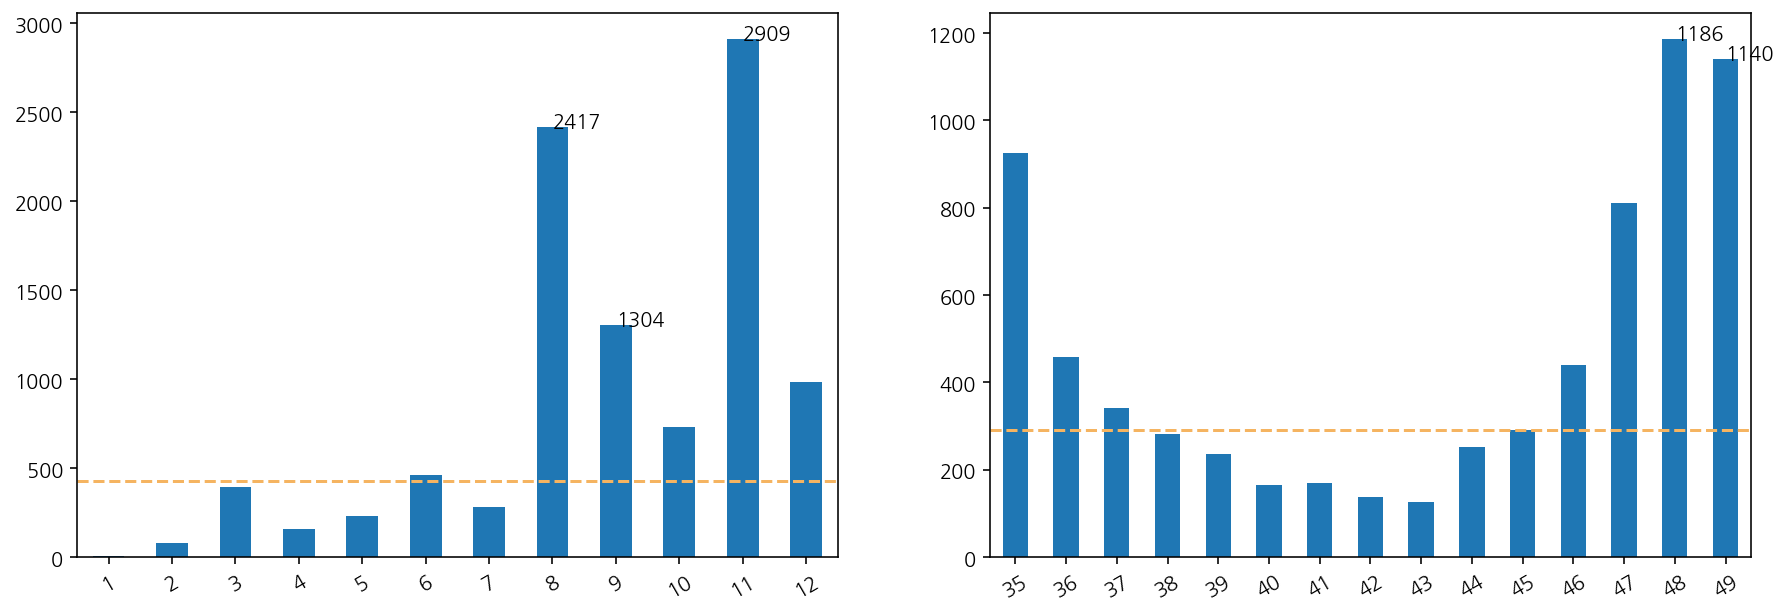

In [26]:
plt.subplot(1,2,1)
confirmed_case_month = covid_table["확진일(월)"].value_counts().sort_index()

g = confirmed_case_month.plot.bar(figsize=(15,5), rot="30")
plt.axhline(confirmed_case_month.median(), color="#f5b461", linestyle="--")
for i in range(len(confirmed_case_month)):
    if confirmed_case_month.iloc[i] > 1000:
        g.text(x = i, y = confirmed_case_month.iloc[i], s = confirmed_case_month.iloc[i])
        
        
plt.subplot(1,2,2)
confirmed_case_week= covid_table["확진일(주)"].value_counts().sort_index().tail(15)
g = confirmed_case_week.plot.bar(figsize=(15,5), rot="30")
plt.axhline(confirmed_case_week.median(), color="#f5b461", linestyle="--")
for i in range(len(confirmed_case_week)):
    if confirmed_case_week.iloc[i] > 1000:
        g.text(x = i, y = confirmed_case_week.iloc[i], s = confirmed_case_week.iloc[i])


## Running total of comfirmed cases

In [27]:
firstDay = covid_table.iloc[-1]["확진일"]
lastDay = covid_table.iloc[0]["확진일"]

days = pd.date_range(firstDay, lastDay).to_frame().rename(columns={0:"확진일자"}).reset_index().drop("index", axis="columns")

In [28]:
days_w_values = covid_table["확진일"].value_counts().to_frame()

In [29]:
days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [30]:
days_w_values.head()

,확진일
2020-12-03,296
2020-12-02,262
2020-12-04,234
2020-11-25,212
2020-11-26,204


In [31]:
all_days = pd.merge(days, days_w_values, left_on="확진일자", right_index=True, how="left").rename(columns={"확진일":"확진자수"})

all_days["누적확진"] = all_days["확진자수"].fillna(0).cumsum()
all_days["일자"] = all_days["확진일자"].astype(str).map(lambda x : x[-5:])


In [32]:
accumulative_days = all_days[["일자", "누적확진"]]
accumulative_days = accumulative_days.set_index("일자")

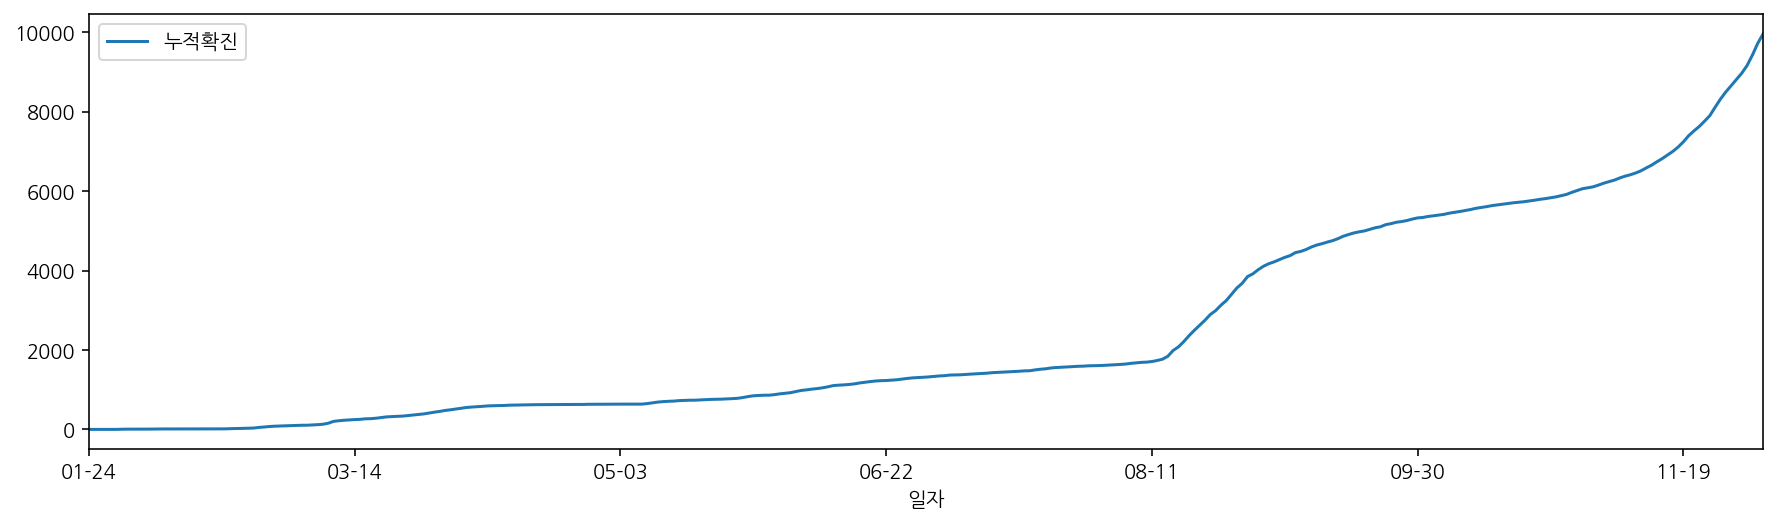

In [33]:
accumulative_days.plot(figsize=(15,4))

## Running total of confirmed cases in log

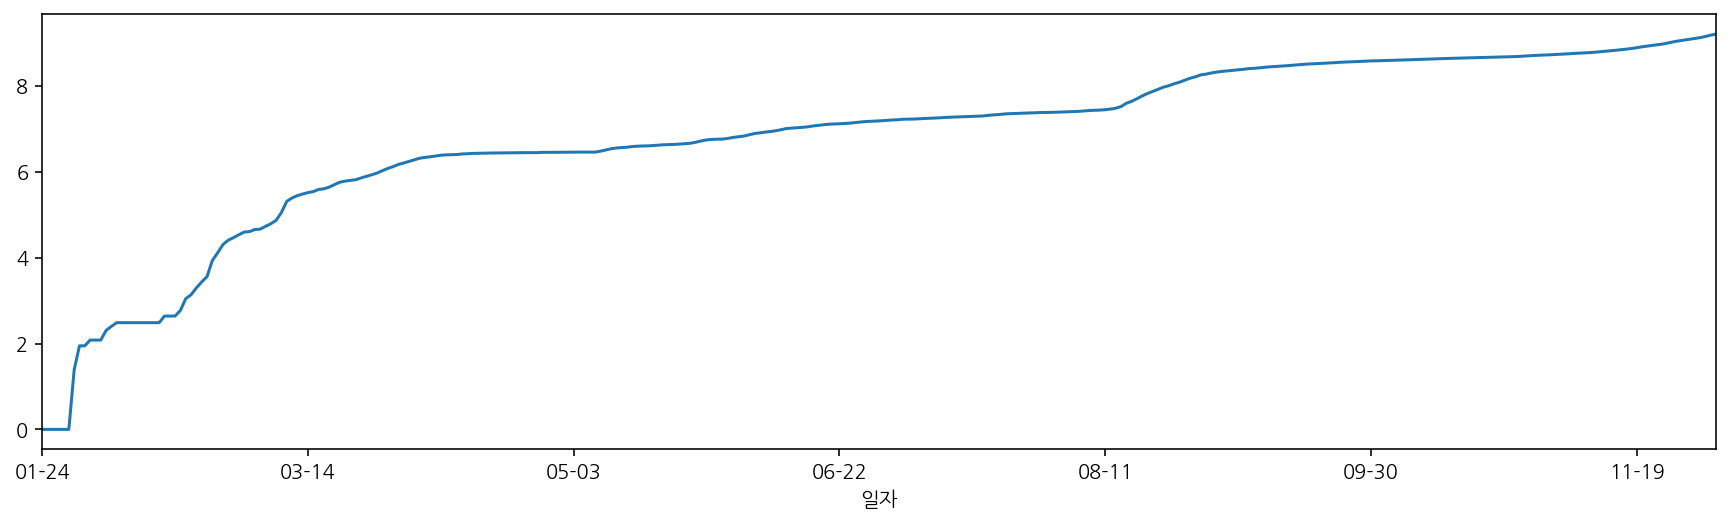

In [34]:
np.log(accumulative_days["누적확진"]).plot(figsize=(15, 4))

## Number of confirmed cases per month and week

In [35]:
all_days["확진일(월)"] = all_days["확진일자"].dt.month
all_days["확진일(요일)"] = all_days["확진일자"].dt.weekday
all_days.head()


,확진일자,확진자수,누적확진,일자,확진일(월),확진일(요일)
0,2020-01-24,1.0,1.0,01-24,1,4
1,2020-01-25,NaN,1.0,01-25,1,5
2,2020-01-26,NaN,1.0,01-26,1,6
3,2020-01-27,NaN,1.0,01-27,1,0
4,2020-01-28,NaN,1.0,01-28,1,1


In [36]:
all_days_week = all_days.groupby(["확진일(월)", "확진일(요일)"])["확진자수"].sum()
all_days_week = all_days_week.to_frame().unstack().fillna(0).astype(int)

dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()

all_days_week.columns = dayofweek
all_days_week.style.background_gradient(cmap="Blues")


,월,화,수,목,금,토,일
확진일(월),,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,289,327,328,336,473,277
9,177,242,228,207,169,155,126


## Number of confirmed cases by district

In [37]:
district = covid_table["거주지"].value_counts()
district.index.unique()

Index(['송파구', '강서구', '관악구', '강남구', '서초구', '노원구', '성북구', '타시도', '동작구', '은평구',
       '양천구', '중랑구', '동대문구', '도봉구', '영등포구', '마포구', '강동구', '구로구', '서대문구', '용산구',
       '기타', '성동구', '강북구', '광진구', '종로구', '금천구', '중구'],
      dtype='object')

In [38]:
district_seoul_temp = district[~district.index.str.contains("한국|타시도|기타")]
non_district_list = set(district.index) - set(district_seoul_temp.index)
non_district = district[district.index.str.contains("한국|타시도|기타")].to_frame()

covid_table.loc[~covid_table["거주지"].isin(non_district_list),"지역"] =covid_table["거주지"]
covid_table.loc[covid_table["거주지"].isin(non_district_list),"지역"] ="타지역"
covid_table.loc[covid_table["거주지"]=="성북","지역"] ="성북구"
covid_table.loc[covid_table["거주지"]=="종랑구","지역"] ="중랑구"

In [39]:
covid_table["지역"].unique()

array(['성북구', '타지역', '중구', '영등포구', '성동구', '서초구', '광진구', '구로구', '은평구',
       '동작구', '강남구', '강동구', '노원구', '관악구', '동대문구', '송파구', '강서구', '도봉구',
       '종로구', '마포구', '중랑구', '강북구', '양천구', '금천구', '용산구', '서대문구'],
      dtype=object)

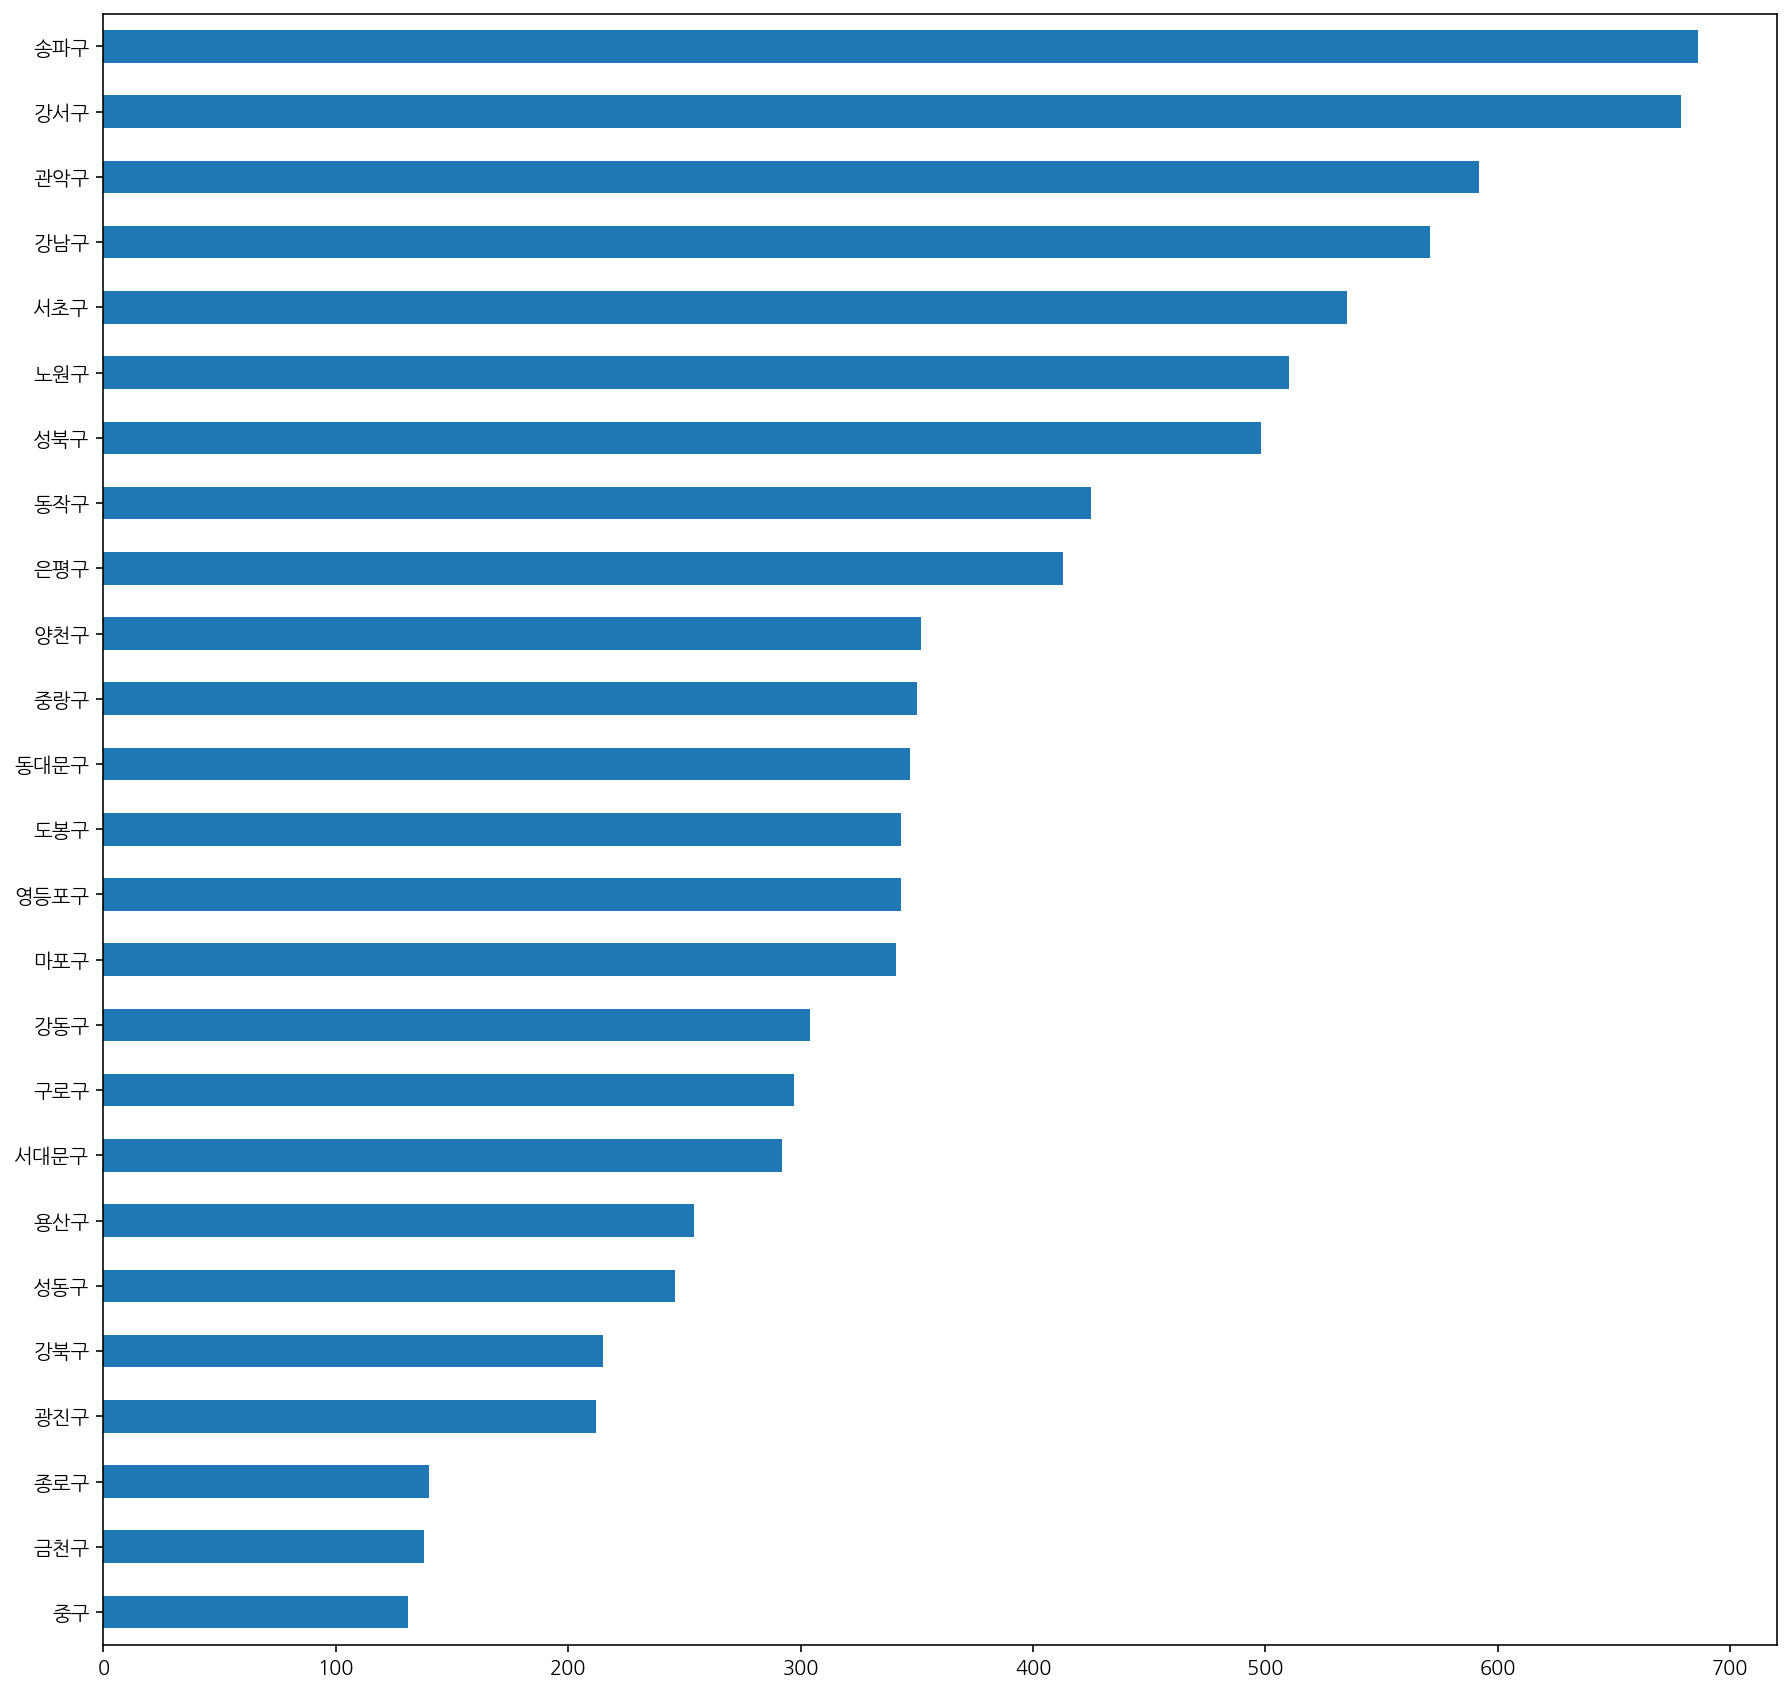

In [40]:
district_seoul=covid_table.loc[covid_table["지역"]!="타지역", "지역"].value_counts().sort_values()
district_seoul.plot.barh(figsize=(15,15))

## Route of infection

In [41]:
covid_table.loc[~covid_table["접촉력"].str.contains("확인"),"접촉력(filter)"] = covid_table["접촉력"]
covid_table.loc[covid_table["접촉력"].str.contains("확인"),"접촉력(filter)"] = "확인 중"

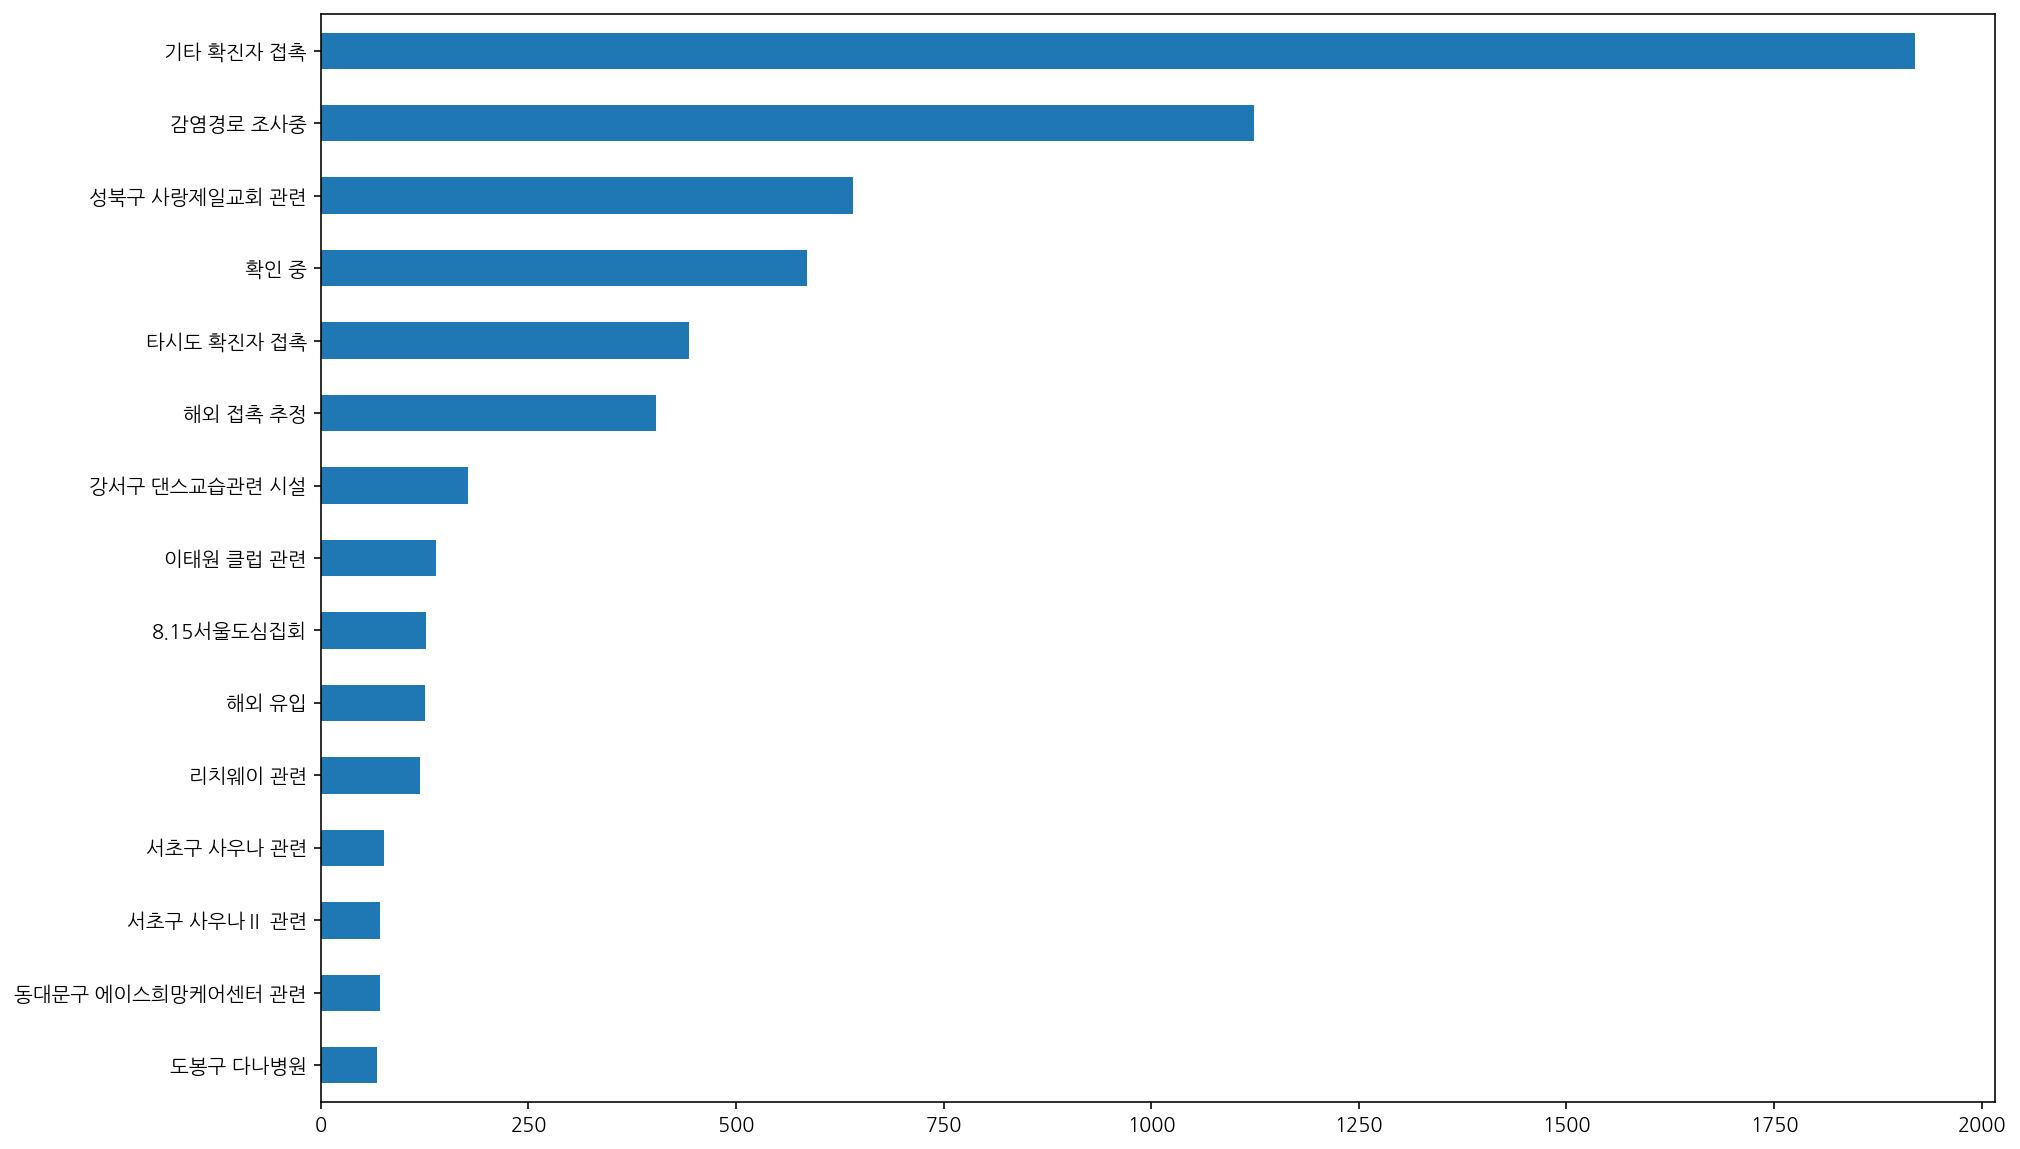

In [42]:
contact_status = covid_table["접촉력"].value_counts()
top15_contact = contact_status.sort_values().tail(15)
top15_contact.plot.barh(figsize=(15,10))

In [43]:
top15_contact_table = covid_table[covid_table["접촉력"].isin(top15_contact.index)]

In [44]:
top15_contact_table.groupby(["접촉력","확진일(월)"]) \
            ["연번"].count().unstack(). \
            fillna(0).astype(int). \
            style.background_gradient(cmap="Blues")

확진일(월),2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,113,13,0,0,0
감염경로 조사중,0,0,0,0,0,0,11,284,125,511,193
강서구 댄스교습관련 시설,0,0,0,0,0,0,0,0,0,168,9
기타 확진자 접촉,0,0,0,0,0,1,422,309,116,730,342
도봉구 다나병원,0,0,0,0,0,0,0,33,35,0,0
동대문구 에이스희망케어센터 관련,0,0,0,0,0,0,0,0,10,61,0
리치웨이 관련,0,0,0,0,119,0,0,0,0,0,0
서초구 사우나 관련,0,0,0,0,0,0,0,0,0,69,7
서초구 사우나Ⅱ 관련,0,0,0,0,0,0,0,0,0,69,2


## Number of confirmed cases from unknown route of infection per month and week

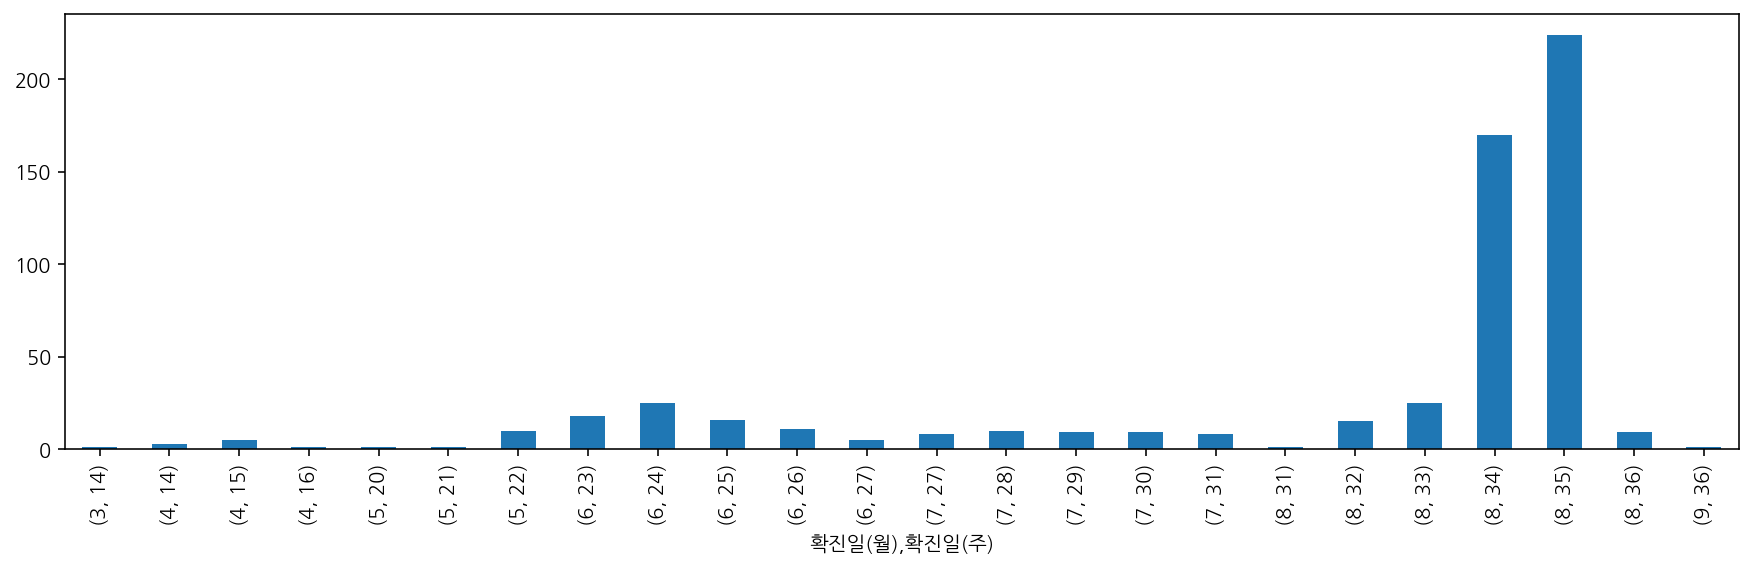

In [45]:
covid_unknown = covid_table[covid_table["접촉력"] == "확인 중"]
unknown_weekly_case = covid_unknown.groupby(["확진일(월)", "확진일(주)"])["연번"].count()
unknown_weekly_case.plot.bar(figsize=(15, 4))

In [46]:
all_weekly_case = covid_table["확진일(주)"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진수"]
all_weekly_case.head()

,전체확진수
48,1186
49,1140
35,925
34,913
47,811


In [47]:
unknown_weekly_case = covid_unknown["확진일(주)"].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진수"]
unknown_weekly_case.head()

,불명확진수
35,224
34,170
33,25
24,25
23,18


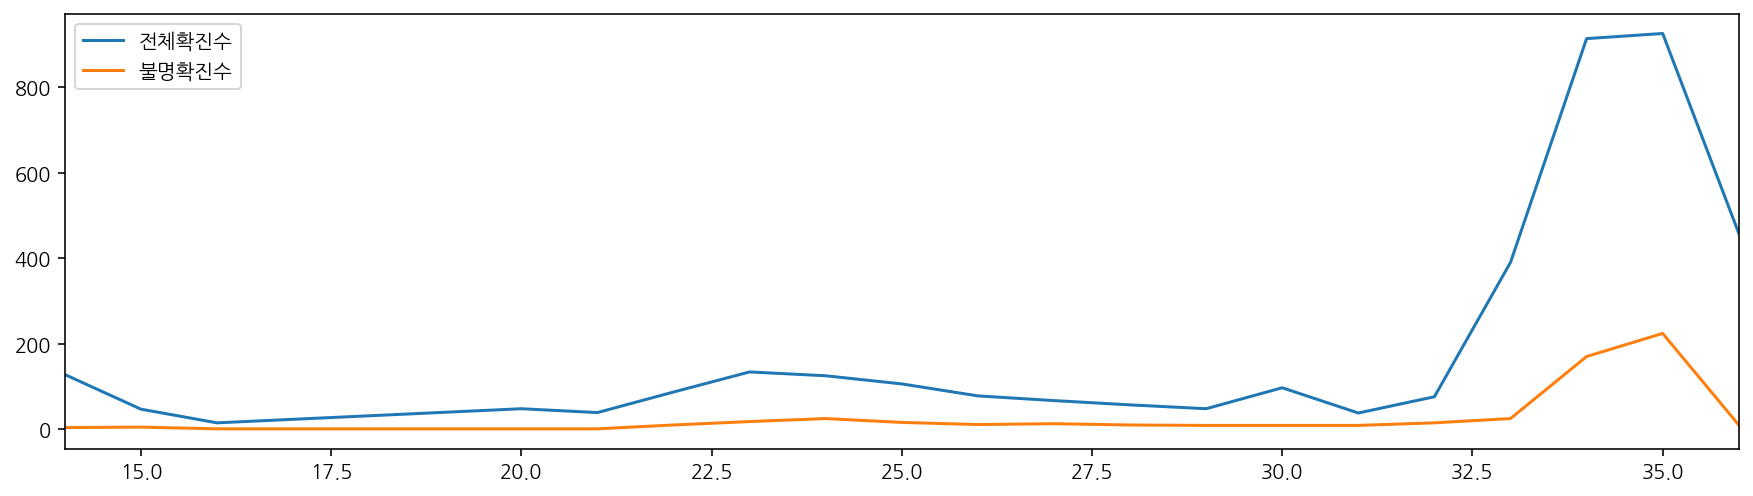

In [48]:
unknown_case = all_weekly_case.merge(unknown_weekly_case, left_index=True, right_index=True)
unknown_case = unknown_case.sort_index()
unknown_case.head()
unknown_case.plot(figsize=(15, 4))

## Number of confirmed cases from unknown route of infection per week

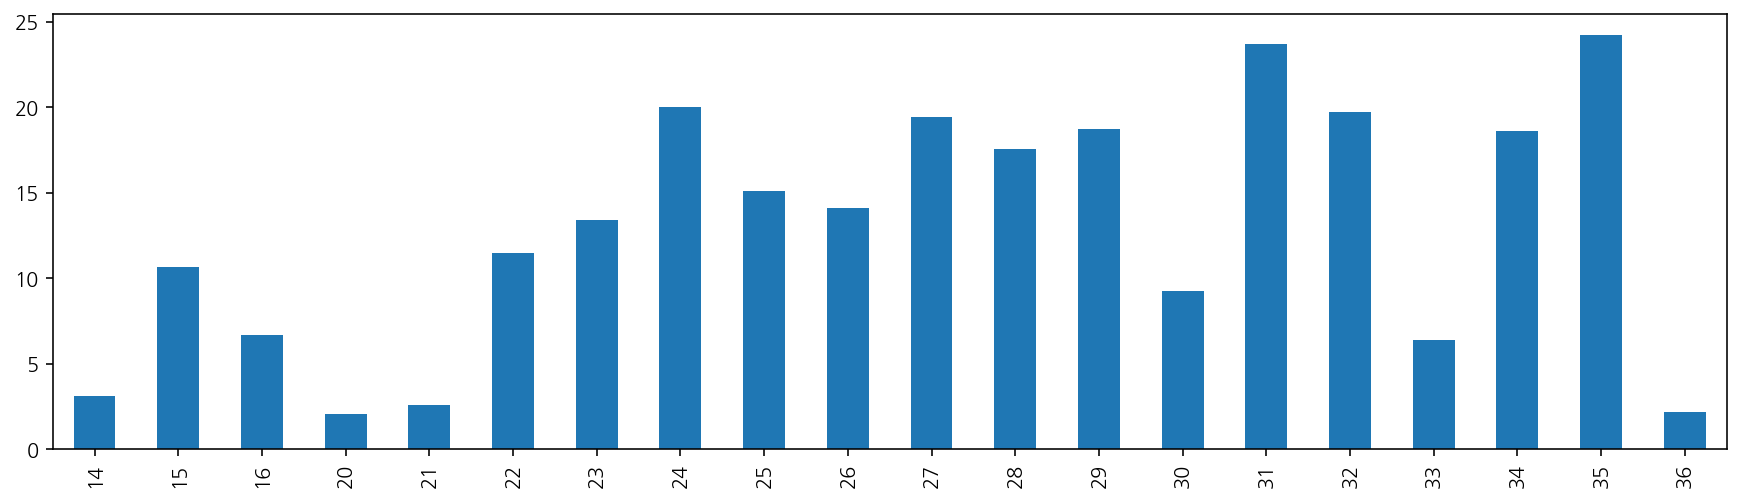

In [49]:
unknown_case["확인중비율"] = (unknown_case["불명확진수"] / unknown_case["전체확진수"]) * 100
unknown_case["확인중비율"].plot.bar(figsize=(15, 4))

## Number of Confirmed cases who caused the most spread

In [50]:
import re

def get_number(text):
    return re.sub("[^0-9]", "", text)

covid_table["접촉번호"] = covid_table["접촉력"].map(get_number)
contact = covid_table["접촉번호"].value_counts().reset_index()

# contact.head()

contact = contact.drop(0)
contact.columns=["접촉번호", "확진자수"]
contact.head(10)


,접촉번호,확진자수
1,815,126
2,11,78
3,9734,4
4,6,4
5,9,4
6,8486,3
7,14483,3
8,8271,3
9,780,3
10,8791,3


In [51]:
covid_table.loc[covid_table["접촉번호"]=="815","접촉력"].unique()

array(['8.15서울도심집회'], dtype=object)

In [52]:
df_contact = contact.head(10)
top_contact_number = df_contact["접촉번호"]
top_contact_number

1       815
2        11
3      9734
4         6
5         9
6      8486
7     14483
8      8271
9       780
10     8791
Name: 접촉번호, dtype: object

## Number of Confirmed cases contacted with the most spreaders

In [53]:
covid_table[covid_table["접촉번호"].isin(top_contact_number)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일(월),확진일(주),확진일(월일),지역,접촉력(filter),접촉번호
112,9839,36715,2020-12-04,강서구,-,강서구 소재 병원관련(11월),NaN,12,49,12-04,강서구,강서구 소재 병원관련(11월),11
113,9838,36716,2020-12-04,강서구,-,강서구 소재 병원관련(11월),NaN,12,49,12-04,강서구,강서구 소재 병원관련(11월),11
114,9837,36719,2020-12-04,강서구,-,강서구 소재 병원관련(11월),NaN,12,49,12-04,강서구,강서구 소재 병원관련(11월),11
115,9836,36718,2020-12-04,강서구,-,강서구 소재 병원관련(11월),NaN,12,49,12-04,강서구,강서구 소재 병원관련(11월),11
552,9399,35578,2020-12-02,강서구,-,강서구 소재 병원관련(11월),NaN,12,49,12-02,강서구,강서구 소재 병원관련(11월),11
623,9328,35451,2020-12-02,관악구,-,강서구 소재 병원관련(11월),NaN,12,49,12-02,관악구,강서구 소재 병원관련(11월),11
935,9016,34825,2020-12-01,관악구,-,강서구 소재 병원관련(11월),NaN,12,49,12-01,관악구,강서구 소재 병원관련(11월),11
1193,8758,33990,2020-11-29,동대문구,-,수도권산악회(11월) 관련,NaN,11,48,11-29,동대문구,수도권산악회(11월) 관련,11
1250,8701,34200,2020-11-29,금천구,-,강서구 소재 병원관련(11월),NaN,11,48,11-29,금천구,강서구 소재 병원관련(11월),11
1461,8490,33066,2020-11-27,동대문구,-,수도권산악회(11월) 관련,NaN,11,48,11-27,동대문구,수도권산악회(11월) 관련,11


In [54]:
covid_table.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일(월),확진일(주),확진일(월일),지역,접촉력(filter),접촉번호
0,9951,36883,2020-12-04,성북구,-,감염경로 조사중,NaN,12,49,12-04,성북구,감염경로 조사중,
1,9950,36886,2020-12-04,기타,-,감염경로 조사중,NaN,12,49,12-04,타지역,감염경로 조사중,
2,9949,36256,2020-12-04,타시도,-,감염경로 조사중,NaN,12,49,12-04,타지역,감염경로 조사중,
3,9948,36532,2020-12-04,타시도,-,감염경로 조사중,NaN,12,49,12-04,타지역,감염경로 조사중,
4,9947,36522,2020-12-04,타시도,-,감염경로 조사중,NaN,12,49,12-04,타지역,감염경로 조사중,


In [55]:
covid_table["퇴원"] = covid_table["퇴원현황"].str.contains("퇴원")
covid_table["사망"] = covid_table["퇴원현황"].str.contains("사망")
covid_table["치료중"] = covid_table["퇴원현황"].isnull()
covid_table["퇴원"] = covid_table["퇴원"].fillna(False)
covid_table["사망"] = covid_table["사망"].fillna(False)


In [56]:
covid_table["퇴원현황(filter)"] = covid_table["퇴원현황"]
covid_table.loc[covid_table["퇴원현황(filter)"].isnull(), "퇴원현황(filter)"] = "치료중"

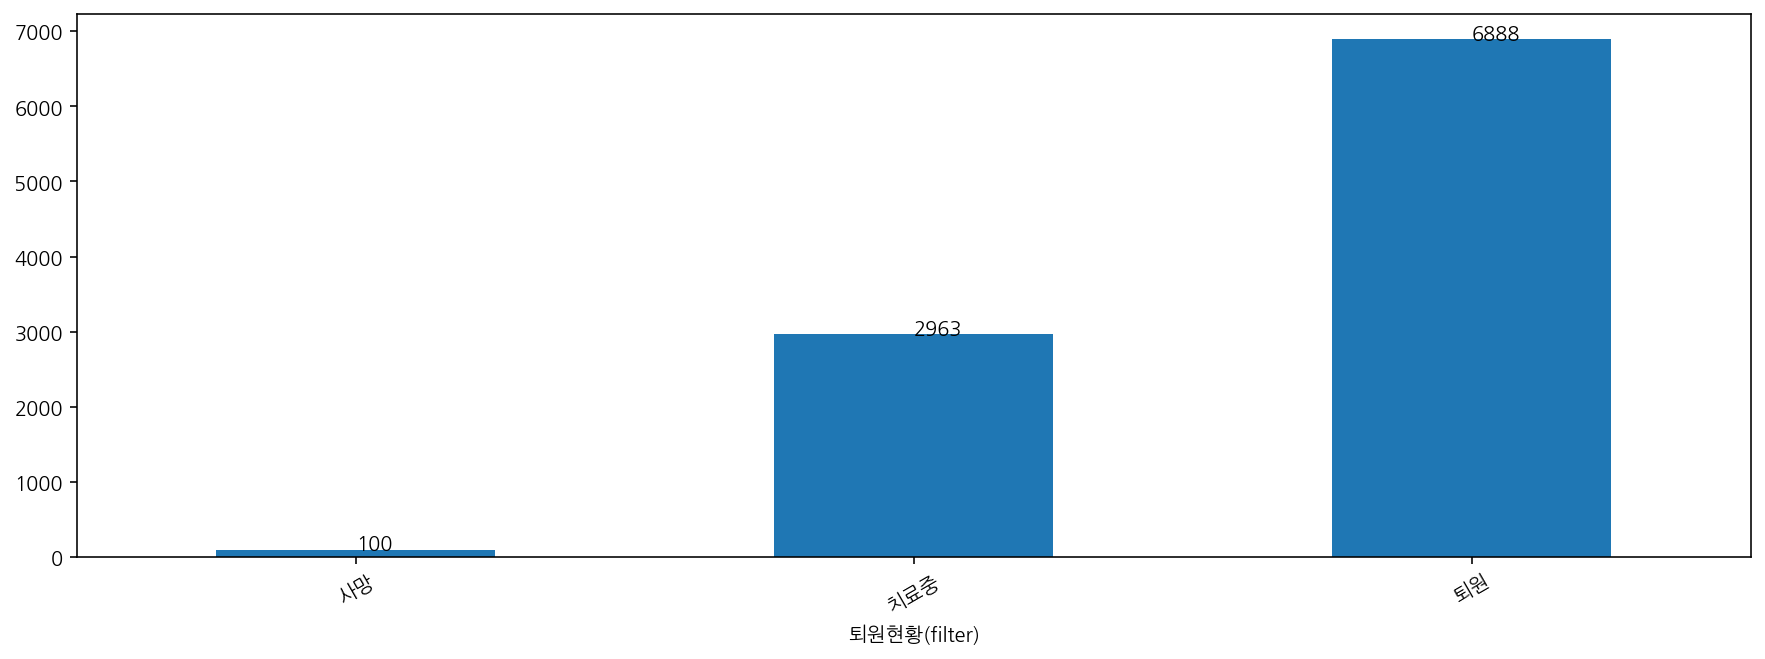

In [57]:
g1 = covid_table.groupby(["퇴원현황(filter)"])["연번"].count()
g1_plot = covid_table.groupby(["퇴원현황(filter)"])["연번"].count().plot.bar(figsize=(15,5), rot="30")
for i in range(g1.shape[0]):
     g1_plot.text(x=i, y=g1[i], s = g1[i])

In [58]:
g2 = covid_table.groupby(["퇴원현황(filter)"])["연번"].count()
g2

퇴원현황(filter)
사망      100
치료중    2963
퇴원     6888
Name: 연번, dtype: int64

In [59]:
g2 = pd.DataFrame(g2)
g2 = g2.rename(columns={"연번":"확진자수"})
g2_total = g2.sum()[0]
print(g2_total)
g2["비율"] = round(g2["확진자수"] / int(g2_total) * 100)
g2

9951


,확진자수,비율
퇴원현황(filter),,
사망,100,1.0
치료중,2963,30.0
퇴원,6888,69.0


## Number of confirmed cases who have been hospitalized for the longest time

In [60]:
covid_table[(covid_table["퇴원"] == False) 
            & (covid_table["사망"] == False) 
            & (covid_table["지역"] != "타지역")].tail(10).sort_values(by="확진일(월일)", ascending=True)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일(월),확진일(주),확진일(월일),지역,접촉력(filter),접촉번호,퇴원,사망,치료중,퇴원현황(filter)
5757,4194,20833,2020-09-03,은평구,-,성북구 사랑제일교회 관련,NaN,9,36,09-03,은평구,성북구 사랑제일교회 관련,,False,False,True,치료중
5349,4602,22036,2020-09-11,관악구,-,감염경로 조사중,NaN,9,37,09-11,관악구,감염경로 조사중,,False,False,True,치료중
5218,4733,22352,2020-09-14,종로구,-,기타 확진자 접촉,NaN,9,38,09-14,종로구,기타 확진자 접촉,,False,False,True,치료중
5197,4754,22411,2020-09-15,마포구,-,강남구 소재 대우디오빌플러스,NaN,9,38,09-15,마포구,강남구 소재 대우디오빌플러스,,False,False,True,치료중
5120,4831,22590,2020-09-16,강남구,-,타시도 확진자 접촉,NaN,9,38,09-16,강남구,타시도 확진자 접촉,,False,False,True,치료중
4527,5424,24316,2020-10-06,중랑구,-,감염경로 조사중,NaN,10,41,10-06,중랑구,감염경로 조사중,,False,False,True,치료중
4397,5554,24667,2020-10-11,용산구,인도,해외 유입,NaN,10,41,10-11,용산구,해외 유입,,False,False,True,치료중
4359,5592,24848,2020-10-13,동작구,-,감염경로 조사중,NaN,10,42,10-13,동작구,감염경로 조사중,,False,False,True,치료중
4291,5660,25064,2020-10-16,송파구,-,송파구 잠언의료기,NaN,10,42,10-16,송파구,송파구 잠언의료기,,False,False,True,치료중
4122,5829,25966,2020-10-25,구로구,-,구로구 가족관련[부천무용학원관련],NaN,10,43,10-25,구로구,구로구 가족관련[부천무용학원관련],,False,False,True,치료중


## Overseas travel path of imported cases

In [61]:
covid_table["해외"] = covid_table["여행력"]
covid_table["해외"] = covid_table["해외"].str.strip()
covid_table["해외"] = covid_table["해외"].replace("-", np.nan)
covid_table["해외"].nunique()

98

In [62]:
covid_table["해외"].value_counts().head(10)

미국        181
영국         51
필리핀        25
우즈베키스탄     18
인도         15
프랑스        15
스페인        13
러시아        11
인도네시아      11
일본         11
Name: 해외, dtype: int64

In [63]:
df_oversea = covid_table[covid_table["해외"].notnull()].copy()
df_oversea.shape

(559, 18)

In [64]:
# data preprocessing

In [65]:
df_oversea["해외"].unique()

array(['미국', '스웨덴', '영국', '일본', '인도네시아', '캐나다', '아르헨티나', '독일', '폴란드',
       '가봉', '터키', '에티오피아', '러시아', '모로코', '브라질', '스페인', '사우디아라비아', '벨기에',
       '이탈리아', '우즈베키스탄', '인도', '쿠웨이트', '크로아티아', '중국', '미얀마', '28238',
       '케냐', '수단', '루마니아', '헝가리', '프랑스', '핀란드', '가나', '튀니지', '아랍에미리트',
       '네팔', '방글라데시', '에디오피아', '네덜란드', '키르기스스탄', '이란', '체코', '필리핀', '요르단',
       '우간다', '몰타', '카타르', '우크라이나', '에콰도르', '키르기즈스탄', '파라과이', '멕시코, 미국',
       '카자흐스탄', '이집트', '21263', '베트남', '멕시코', '홍콩', '이라크', '모로코, 터키',
       '나이지리아', '미국, 멕시코', '페루', 'UAE', '파키스탄', '아일랜드', '콩코, 프랑스',
       '페루, 미국', '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '포르투칼',
       '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '아르헨티나, 볼리비아, 브라질', '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아',
       '프랑스, 독일', '미국, 캐나다', '스페인, 카타르', '이탈리아, 프랑스',
       '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아', '영국, 프랑스',
       '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스', '이탈리아, 독일, 홍콩',
       '중국 청도', '우한교민', '중국 우한시', '싱가포르'

In [66]:
europe = "체코, 헝가리, 오스트리아, 이탈리아, 모로코, 독일, 폴란드, 터키, \
아일랜드, 핀란드, 네덜란드, 우크라이나, 루마니아, 포르투칼, 스웨덴, 벨기에, 몰타, 크로아티아"
europe = europe.replace(", ", "|")
df_oversea[df_oversea["해외"].str.contains(europe)].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일(월),확진일(주),확진일(월일),지역,접촉력(filter),접촉번호,퇴원,사망,치료중,퇴원현황(filter),해외
106,9845,36581,2020-12-04,영등포구,스웨덴,해외 유입,NaN,12,49,12-04,영등포구,해외 유입,,False,False,True,치료중,스웨덴
398,9553,35838,2020-12-03,영등포구,독일,해외 유입,NaN,12,49,12-03,영등포구,해외 유입,,False,False,True,치료중,독일
1853,8098,32200,2020-11-25,광진구,폴란드,해외 유입,NaN,11,48,11-25,광진구,해외 유입,,False,False,True,치료중,폴란드
2075,7876,31604,2020-11-24,강남구,터키,해외 유입,NaN,11,48,11-24,강남구,해외 유입,,False,False,True,치료중,터키
2131,7820,31607,2020-11-24,강남구,터키,해외 유입,NaN,11,48,11-24,강남구,해외 유입,,False,False,True,치료중,터키


In [67]:
south_america = "브라질, 아르헨티아, 칠레, 볼리비아, 멕시코, 페루, 에콰도르, 파라과이"
south_america = south_america.replace(", ", "|")
south_america

'브라질|아르헨티아|칠레|볼리비아|멕시코|페루|에콰도르|파라과이'

In [68]:
asia = "인도네시아, 말레이시아, 싱가포르, 태국, 브루나이, 홍콩, 베트남, 라오스, 미얀마, 캄보디아, 동티모르, \
파푸아뉴기니, 이라크, 카자흐스탄, 사우디아라비아, UAE, 키르기스스탄, 방글라데시, 키르기즈스탄, 카타르, \
파키스탄, 네팔, 쿠웨이트, 파키스탄, 이집트, 이란, 요르단"
asia = asia.replace(", ", "|")
asia

'인도네시아|말레이시아|싱가포르|태국|브루나이|홍콩|베트남|라오스|미얀마|캄보디아|동티모르|파푸아뉴기니|이라크|카자흐스탄|사우디아라비아|UAE|키르기스스탄|방글라데시|키르기즈스탄|카타르|파키스탄|네팔|쿠웨이트|파키스탄|이집트|이란|요르단'

In [69]:
africa = "에티오피아, 에디오피아, 우간다, 가나, 가봉, 수단, 튀니지, 나이지리아, 케냐"
africa = africa.replace(", ", "|")
africa

'에티오피아|에디오피아|우간다|가나|가봉|수단|튀니지|나이지리아|케냐'

In [70]:

df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"), "해외"] = "중국"
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"), "해외"] = "필리핀"
df_oversea.loc[df_oversea["해외"].str.contains("미국"), "해외"] = "미국"

df_oversea.loc[df_oversea["해외"].str.contains("프랑스, 스페인|스페인, 프랑스|영국, 프랑스|콩코, 프랑스|스페인, 카타르"), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains("팔라우|28238|21263"), "해외"] = "기타"

df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = "남미"
df_oversea.loc[df_oversea["해외"].str.contains(asia), "해외"] = "아시아"
df_oversea.loc[df_oversea["해외"].str.contains(africa), "해외"] = "아프리카"


df_oversea["해외"].value_counts()

미국        189
아시아        89
유럽         64
영국         51
필리핀        27
남미         21
우즈베키스탄     18
인도         15
프랑스        15
스페인        13
아프리카       12
러시아        11
일본         11
중국         10
캐나다         8
기타          4
아르헨티나       1
Name: 해외, dtype: int64

In [71]:
day_oversea = df_oversea.groupby(["확진일", "해외"])["연번"].count()
day_oversea.head()

확진일         해외 
2020-01-24  중국     1
2020-01-30  중국     2
2020-02-02  중국     1
2020-02-05  아시아    1
2020-02-06  중국     1
Name: 연번, dtype: int64

In [72]:
day_oversea = day_oversea.groupby(level=[1]).cumsum()
day_oversea

확진일         해외    
2020-01-24  중국          1
2020-01-30  중국          3
2020-02-02  중국          4
2020-02-05  아시아         1
2020-02-06  중국          5
2020-02-07  중국          6
2020-02-23  아시아         2
2020-02-25  아시아         3
            중국          7
2020-02-27  유럽          2
2020-02-29  유럽          3
            일본          1
2020-03-04  유럽          4
2020-03-07  유럽          5
2020-03-09  필리핀         1
2020-03-10  유럽          6
2020-03-11  유럽          7
2020-03-12  유럽          9
            필리핀         2
2020-03-13  유럽         10
            프랑스         1
2020-03-14  필리핀         3
2020-03-16  유럽         11
2020-03-17  미국          1
            영국          1
            프랑스         2
2020-03-18  스페인         2
            유럽         13
            필리핀         4
2020-03-19  스페인         3
            영국          3
            유럽         15
            필리핀         5
2020-03-20  미국          5
            유럽         16
            캐나다         1
            필리핀         8
2020-03-21  유럽     

In [73]:
df_day_oversea = day_oversea.reset_index()
df_day_oversea = df_day_oversea.rename(columns={"연번":"누적확진수"})
df_day_oversea.head()

,확진일,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,아시아,1
4,2020-02-06,중국,5


In [74]:
oversea_count = df_oversea["해외"].value_counts()

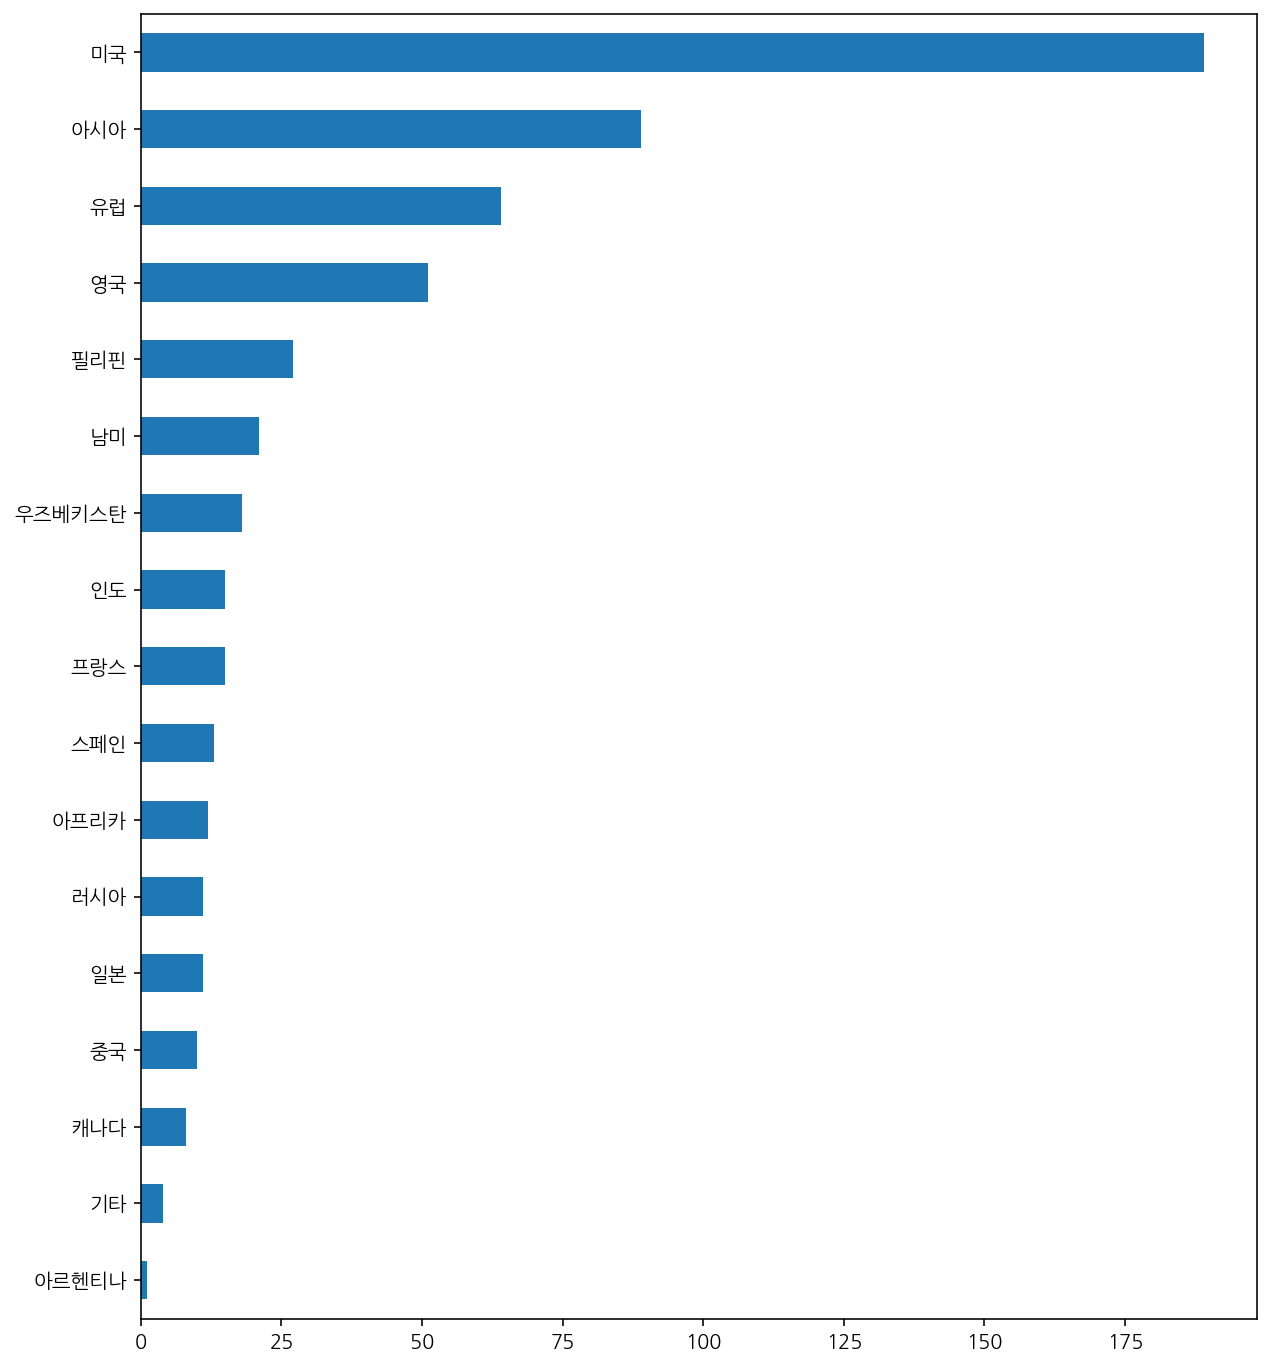

In [75]:
oversea_count.sort_values().plot.barh(figsize=(10, 12))

In [76]:
df_day_oversea = df_day_oversea.set_index("확진일")

Text(0.5, 0.9, '남미 누적확진자수')

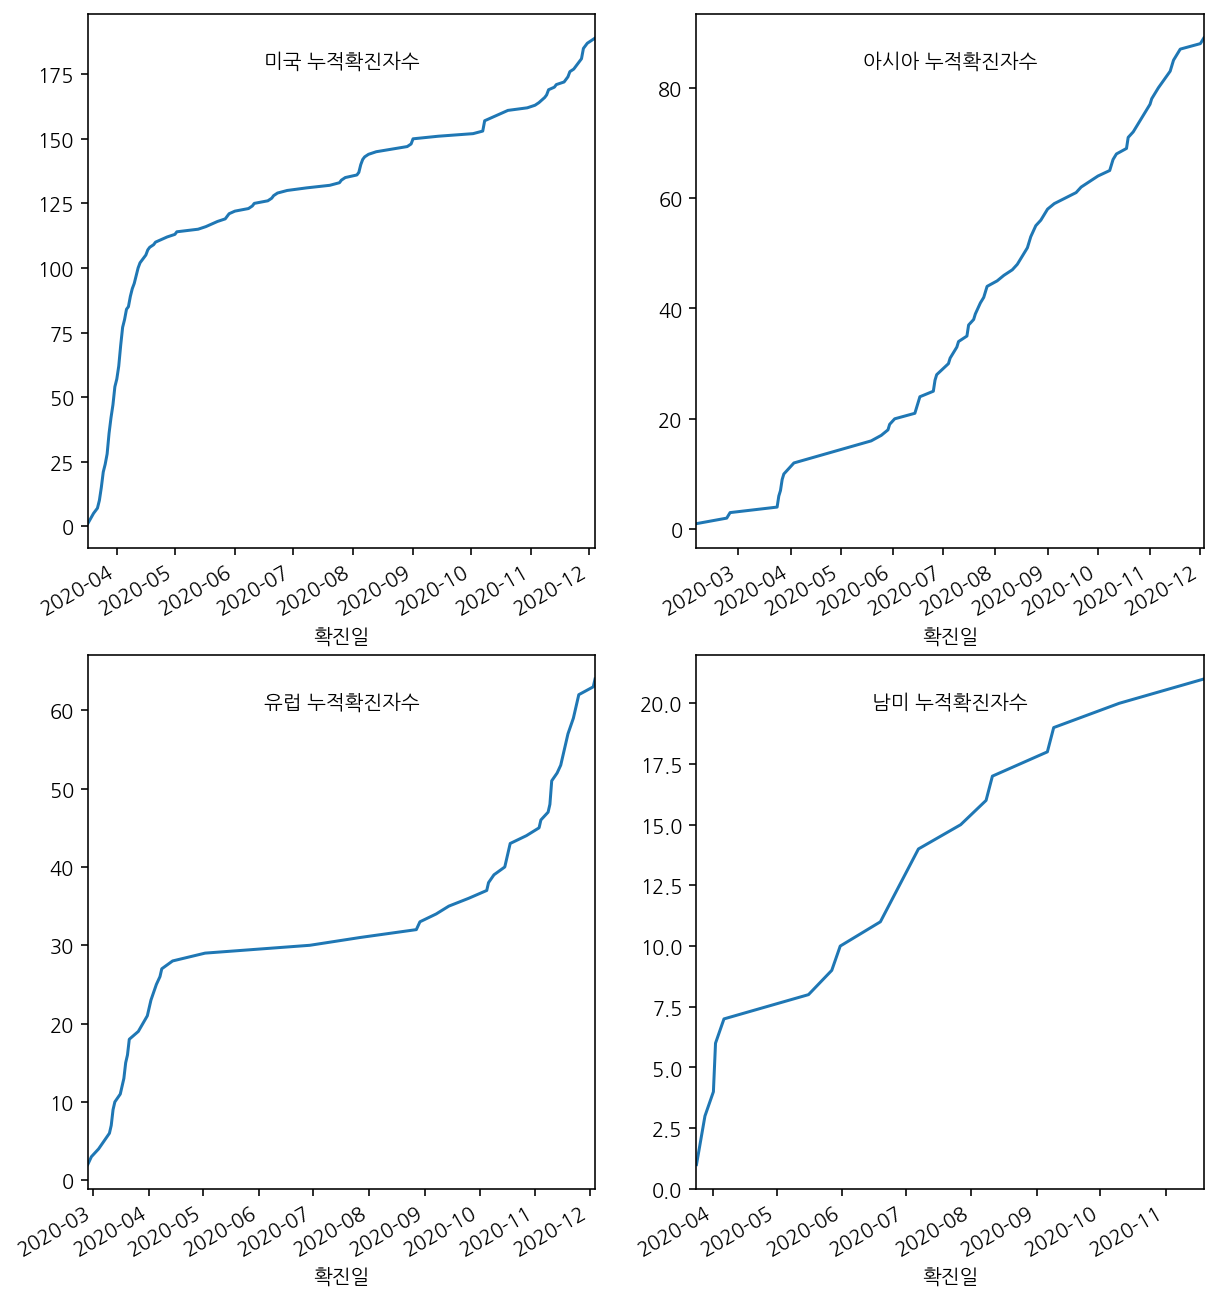

In [77]:

plt.subplot(2,2,1)
g1 = df_day_oversea.loc[df_day_oversea["해외"] == "미국", "누적확진수"].plot(figsize=(10, 5))
g1.text(.5,.9,'미국 누적확진자수',horizontalalignment='center', transform=g1.transAxes)

plt.subplot(2,2,2)
g2 = df_day_oversea.loc[df_day_oversea["해외"] == "아시아", "누적확진수"].plot(figsize=(10, 5))
g2.text(.5,.9,'아시아 누적확진자수',horizontalalignment='center', transform=g2.transAxes)

plt.subplot(2,2,3)
g3 = df_day_oversea.loc[df_day_oversea["해외"] == "유럽", "누적확진수"].plot(figsize=(10, 12))
g3.text(.5,.9,'유럽 누적확진자수',horizontalalignment='center', transform=g3.transAxes)

plt.subplot(2,2,4)
g4 = df_day_oversea.loc[df_day_oversea["해외"] == "남미", "누적확진수"].plot(figsize=(10, 12))
g4.text(.5,.9,'남미 누적확진자수',horizontalalignment='center', transform=g4.transAxes)

In [78]:
oversea_count_gu = df_oversea["지역"].value_counts()
oversea_count_gu.head()

타지역    67
강남구    58
용산구    42
마포구    39
송파구    34
Name: 지역, dtype: int64

## Imported cases from overseas by district

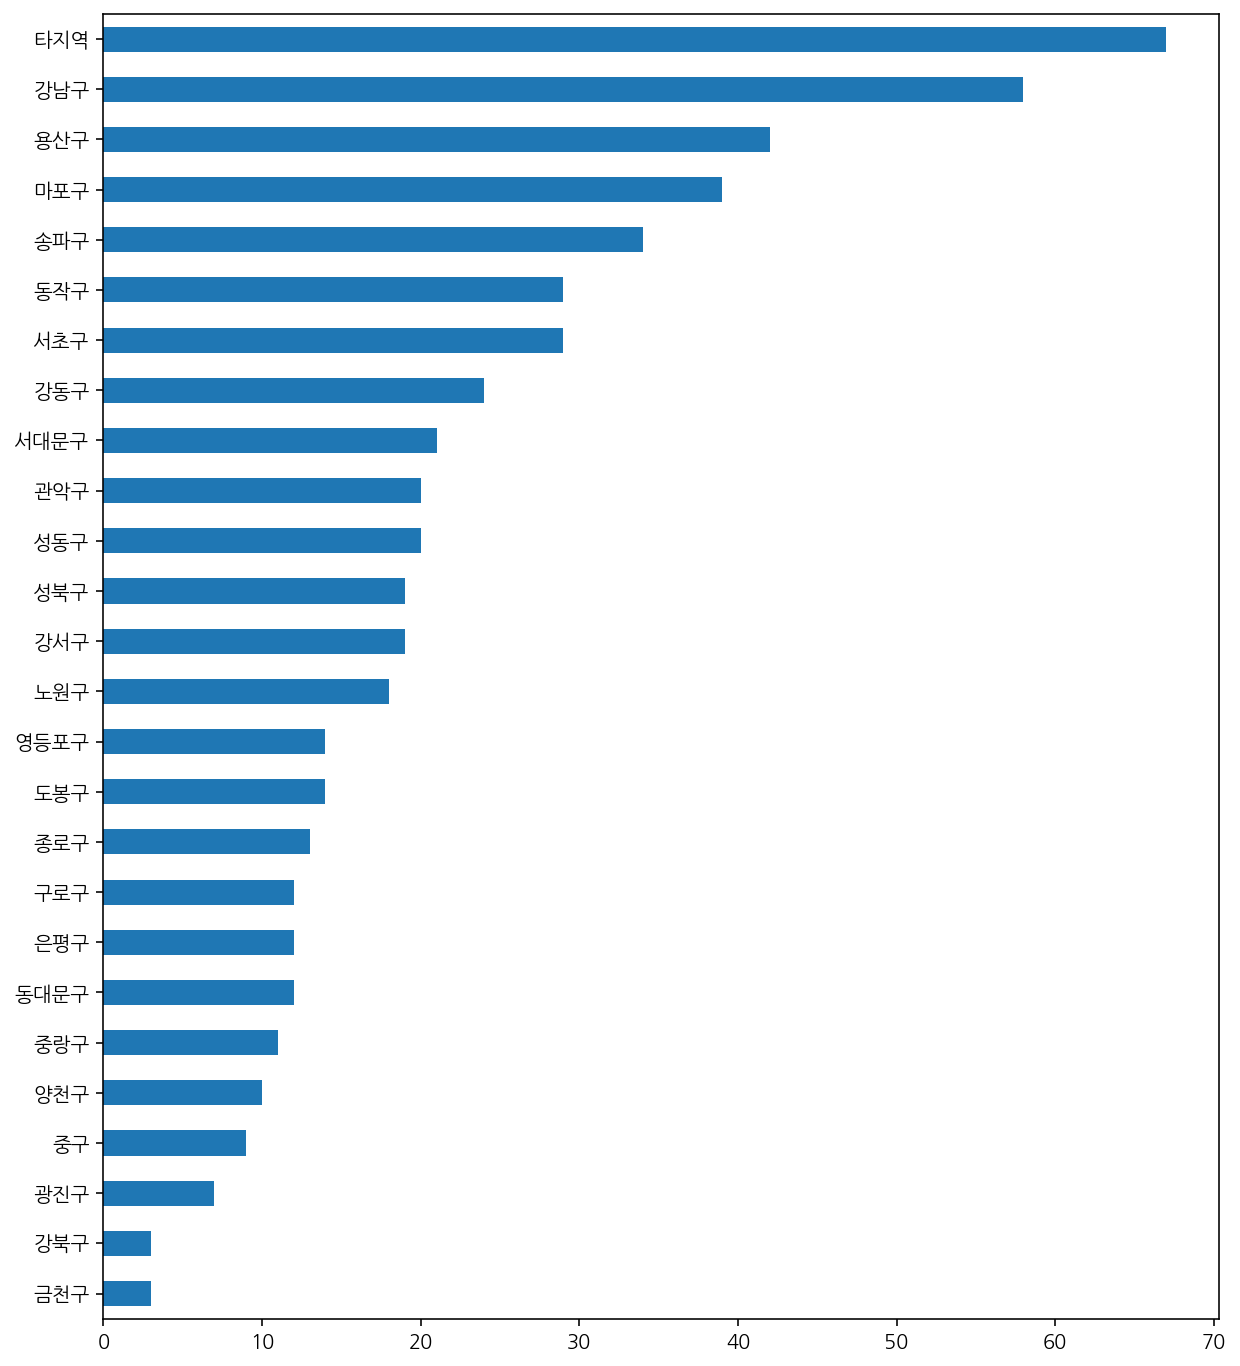

In [79]:
oversea_count_gu.sort_values().plot.barh(figsize=(10, 12))

## Comparison between total confirmed cases and imported cases from overseas by district

In [80]:
all_count_gu = covid_table["지역"].value_counts()

In [81]:
df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ["전체확진수"]
df_all_gu

,전체확진수
타지역,737
송파구,686
강서구,679
관악구,592
강남구,571
서초구,535
노원구,510
성북구,498
동작구,425
은평구,413


In [82]:
df_oversea_gu = pd.DataFrame({"해외유입확진수" : oversea_count_gu})

In [83]:
df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case.head()

,전체확진수,해외유입확진수
타지역,737,67
송파구,686,34
강서구,679,19
관악구,592,20
강남구,571,58


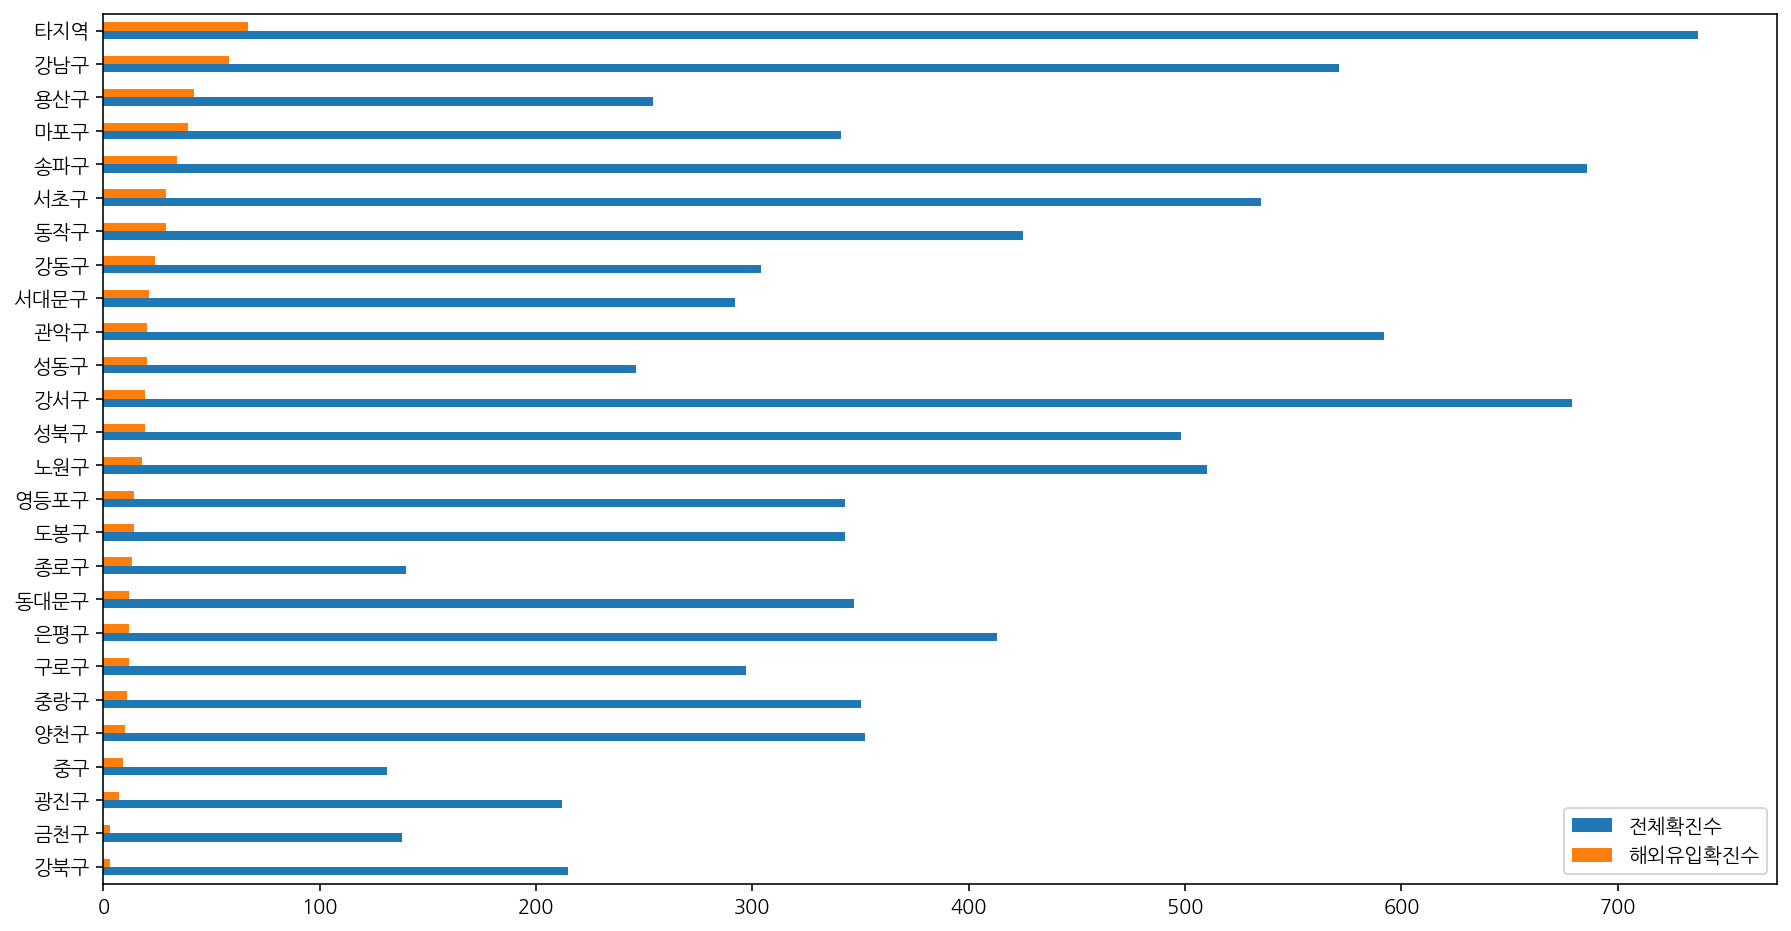

In [84]:
df_all_oversea_case.sort_values(by="해외유입확진수").plot.barh(figsize=(15, 8))

In [85]:
df_all_oversea_case["해외유입비율"] = (df_all_oversea_case["해외유입확진수"] / df_all_oversea_case["전체확진수"]) * 100
df_all_oversea_case.sort_values(by="해외유입비율", ascending=False).head(10)

,전체확진수,해외유입확진수,해외유입비율
용산구,254,42,16.535433
마포구,341,39,11.436950
강남구,571,58,10.157618
종로구,140,13,9.285714
타지역,737,67,9.090909
성동구,246,20,8.130081
강동구,304,24,7.894737
서대문구,292,21,7.191781
중구,131,9,6.870229
동작구,425,29,6.823529


## Number of imported cases from overseas who are discharged

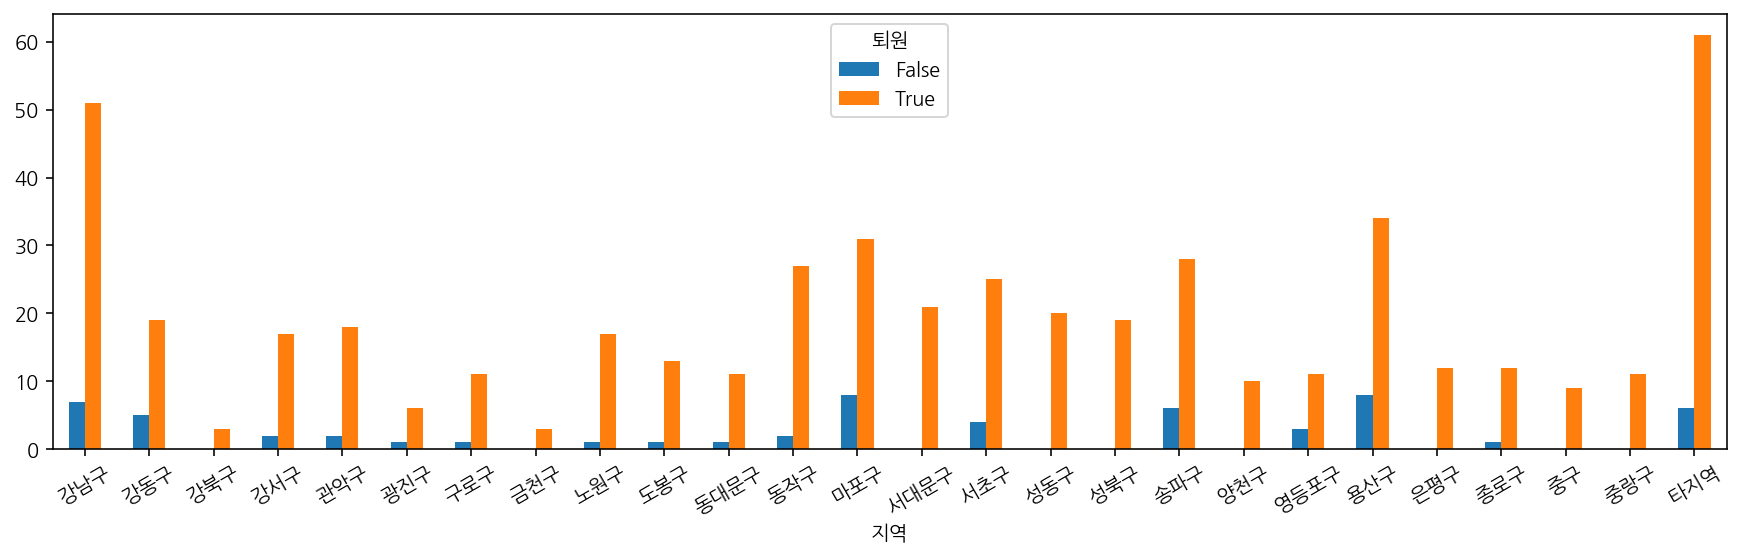

In [86]:
oversea_finish_count = df_oversea.groupby(["지역", "퇴원"])["연번"].count().unstack()
oversea_finish_count = oversea_finish_count.fillna(0).astype(int)
oversea_finish_count.plot.bar(figsize=(15, 4), rot=30)

## Number of imported cases from overseas per month

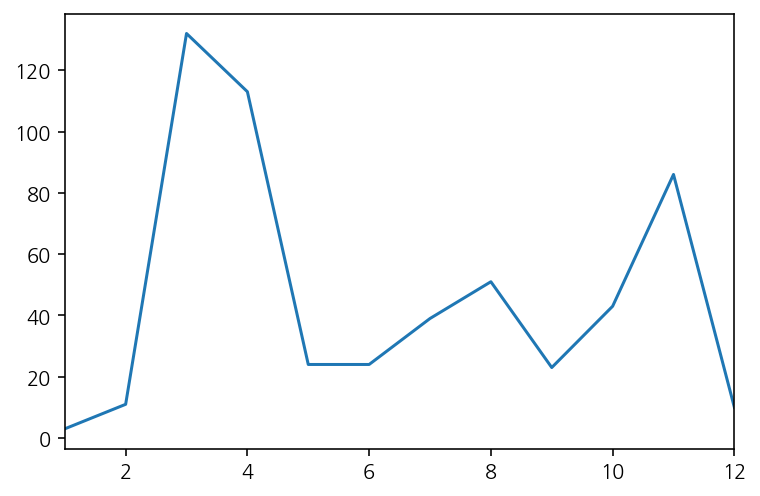

In [87]:
oversea_monthly_case = df_oversea["확진일(월)"].value_counts()
oversea_monthly_case.sort_index().plot()

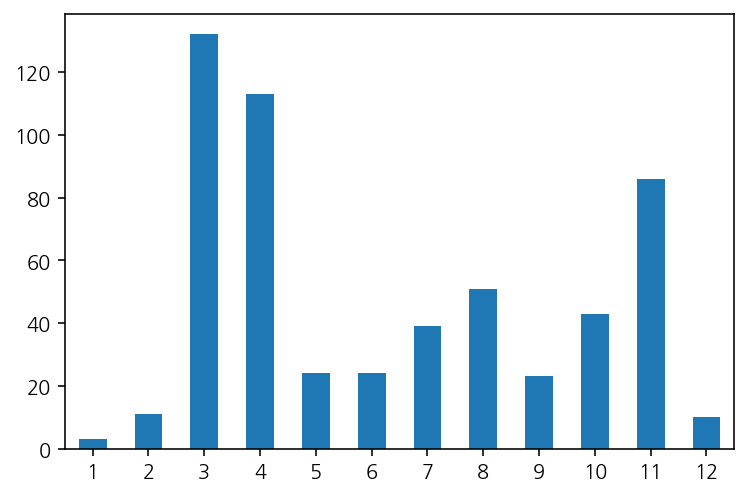

In [88]:
oversea_monthly_case.sort_index().plot.bar(rot=0)

## Number of imported cases from overseas per month by district


In [89]:
month_gu = df_oversea.groupby(["확진일(월)", "지역"])["연번"].count().unstack()
month_gu = month_gu.fillna(0).astype(int)
month_gu.style.background_gradient(cmap="Greens")

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
확진일(월),,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,2
3,21,4,1,3,6,3,9,3,3,4,1,12,4,1,10,2,5,9,1,3,6,3,2,3,5,8
4,16,1,0,2,5,0,0,0,2,3,5,5,7,5,8,12,6,8,1,5,5,2,2,0,2,11
5,2,2,1,2,1,0,0,0,2,2,0,0,1,2,0,1,0,1,0,0,6,0,1,0,0,0
6,0,2,0,0,2,0,1,0,2,0,1,0,0,2,2,1,0,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,4
8,1,0,0,2,2,1,0,0,2,3,2,4,2,0,1,0,3,3,1,0,5,1,1,3,0,14
9,4,1,0,0,0,0,0,0,1,0,0,4,1,1,1,1,0,0,2,1,0,0,0,0,0,6


## Number of confirmed cases of top 5 districts where the most imported cases from overseas appear

In [90]:
top_oversea_gu = df_oversea["지역"].value_counts().head().index

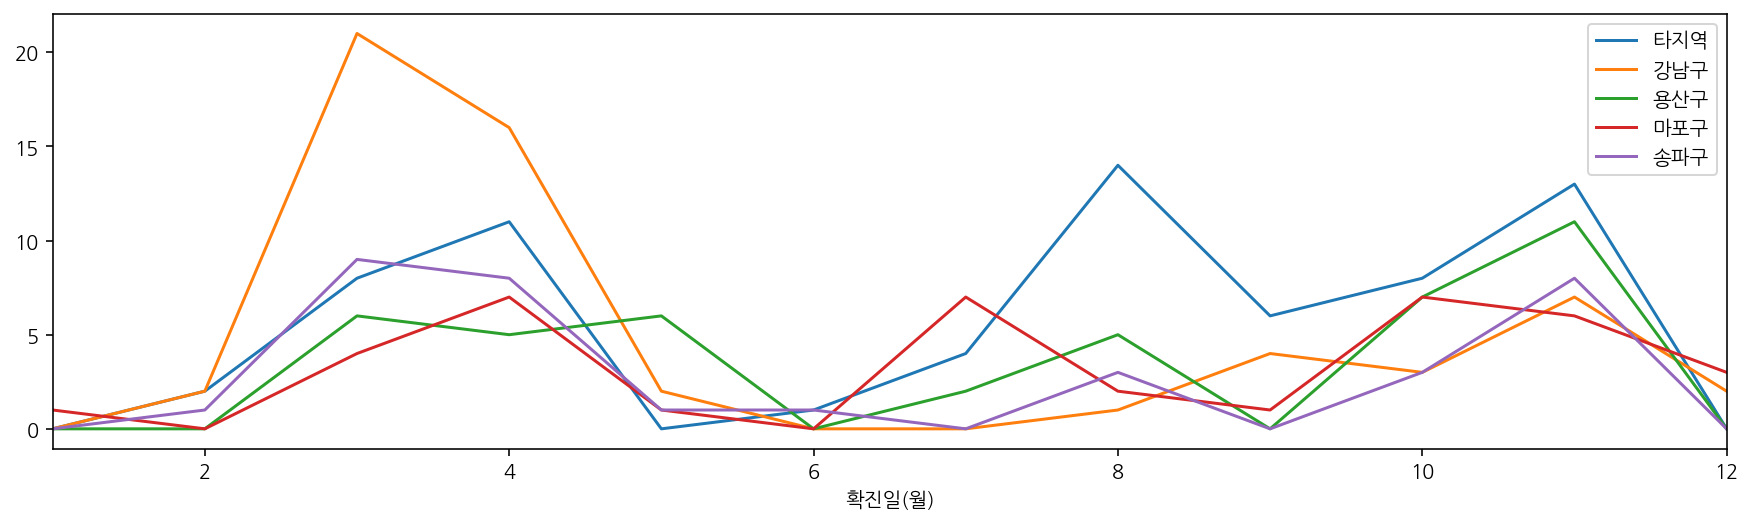

In [91]:
g = month_gu[top_oversea_gu].plot(figsize=(15, 4))
g.legend(loc=1)

## Number of imported cases from overseas by route and district

In [92]:
group_oversea_gu = df_oversea.groupby(["해외", "지역"])["연번"].count().unstack()
group_oversea_gu.fillna(0).astype(int)

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
기타,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
남미,3,1,0,0,1,0,0,0,0,0,1,4,3,1,0,0,0,2,0,0,2,0,0,0,0,3
러시아,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,2,1,2
미국,35,9,2,5,6,2,8,1,4,7,3,8,6,6,14,10,10,11,3,2,9,2,3,2,4,17
스페인,1,0,0,0,0,1,0,0,2,2,1,1,2,0,0,0,0,0,0,0,1,0,0,0,0,2
아르헨티나,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
아시아,3,2,0,3,2,0,0,0,2,3,1,8,3,5,2,1,3,7,4,0,9,4,3,3,2,19
아프리카,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,3,0,1,0,0,3
영국,6,2,0,1,2,0,2,2,0,0,1,5,3,2,3,1,2,6,1,4,2,0,1,1,1,3


In [93]:
group_oversea_gu = df_oversea.groupby(["해외", "지역"])["연번"].count().unstack()
group_oversea_gu = group_oversea_gu.fillna(0).astype(int)
group_oversea_gu.style.background_gradient(cmap="Blues")

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
기타,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
남미,3,1,0,0,1,0,0,0,0,0,1,4,3,1,0,0,0,2,0,0,2,0,0,0,0,3
러시아,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,2,1,2
미국,35,9,2,5,6,2,8,1,4,7,3,8,6,6,14,10,10,11,3,2,9,2,3,2,4,17
스페인,1,0,0,0,0,1,0,0,2,2,1,1,2,0,0,0,0,0,0,0,1,0,0,0,0,2
아르헨티나,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
아시아,3,2,0,3,2,0,0,0,2,3,1,8,3,5,2,1,3,7,4,0,9,4,3,3,2,19
아프리카,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,3,0,1,0,0,3
영국,6,2,0,1,2,0,2,2,0,0,1,5,3,2,3,1,2,6,1,4,2,0,1,1,1,3
